# Explotary Data Analysis in World Bank Open Data

## What is World Bank Open Data?

World Bank Open Data is an initiative by the World Bank Group to provide free and open access to a wealth of data on global development and economic indicators.
It offers a comprehensive repository of data covering a wide range of topics, including economic, social, financial, environmental, and health data, from countries and regions around the world.

## What is World Bank API?

The World Bank API is a tool that allows programmatic access to the data and information made available through the World Bank Open Data initiative. Users can use the API to request specific data sets, indicators, and information by specifying query parameters such as data set IDs, countries or regions, time periods, and data formats.

### Purpose and initial information about exploratory data analysis:

In this project, a comparative analysis was made between Turkey and the top 10 countries according to IMF 2023 'GDP by Countries (million USD)' data (You can access IMF data here = https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)) and an analysis specific to Turkey only. 

**Countries used in the project(ISO2 Codes):**

+ US - United States of America
+ CN - China
+ JP - Japan 
+ DE - Germany
+ GB - Great Britain
+ FR - France
+ IN - India
+ IT - Italy
+ CA - Canada
+ BR - Brazil
+ TR - Turkey

**Indicator codes used during analysis:**

+ "NY.GDP.MKTP.CD" = Gross Domestic Product (GDP)
+ "FP.CPI.TOTL.ZG" = Inflation Rate (Consumer Price Index)
+ "SL.UEM.TOTL.ZS" = Unemployment Rate
+ "GC.DOD.TOTL.GD.ZS" = Government Debt as a Percentage of GDP
+ "NE.EXP.GNFS.CD" = Total Exports (Goods and Services)
+ "EN.POP.DNST" = Population Density
+ "SP.URB.TOTL.IN.ZS" = Urban Population as a Percentage of Total Population
+ "EN.URB. MCTY.TL.ZS" = Urban Population in the Capital as a Percentage of Total Urban Population
+ "EN.ATM.CO2E.PC" = CO2 Emissions per Capita (Metric Tons)
+ "EG.FEC.RNEW.ZS" = Renewable Energy Consumption
+ "SH.XPD.CHEX.GD.ZS" = Healthcare Spending as a Percentage of GDP
+ "SP.DYN.LE00.IN" = Life Expectancy at Birth
+ "EG.IMP.CONS.ZS" = Energy Imports as a Percentage of Total Energy Consumption 
+ "SL.TLF.CACT.MA.ZS" = Male Labor Force Participation Rate
+ "NY.GNS.ICTR.ZS" = Savings Rate as a Percentage of GDP
+ "SL.TLF.CACT.FE.ZS" = Female Labor Force Participation Rate
+ "SE.PRM.ENRR" = Primary Education Enrollment Ratio
+ "SE.ADT.LITR.ZS" = Literacy Rate (Adult, Aged 15 and Older)

**To access the open source API used while making exploratory data  analysis:**
+ https://datahelpdesk.worldbank.org/knowledgebase/articles/889392-api-documentation 
+ https://documents.worldbank.org/en/publication/documents-reports/api


## Import required libraries

In [2]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.3f}'.format

# Accessing World Bank Data

## Data Retrieval

### An overview of the economy of selected countries

This is the section where the parts of the data in the World Bank API that will be useful for the project are converted into a structured format(**DataFrame**).

First of all, since I chose the countries based on GDP data, I wanted to take a general look at the economies of all the selected countries. Among the topics we will examine throughout the project, the most important one and perhaps one that is directly or indirectly linked to all topics is economy.

Indicator codes used in this section and their meanings:

+ "NY.GDP.MKTP.CD" = Gross Domestic Product (GDP)
+ "FP.CPI.TOTL.ZG" = Inflation Rate (Consumer Price Index)
+ "SL.UEM.TOTL.ZS" = Unemployment Rate
+ "GC.DOD.TOTL.GD.ZS" = Government Debt as a Percentage of GDP
+ "NE.EXP.GNFS.CD" = Total Exports (Goods and Services)

The function where we will make the API call required to obtain the data frame:

+  **retrieve_data()** =  Function that allows the requested data to be written to a data frame by using the selected indicator code and country code.

In [3]:
def retrieve_data(indicator_code, countries):
    temp_df = []

    for country in countries:
        page = 1
        total_pages = 2

        while page <= total_pages:
            url = f"https://api.worldbank.org/v2/country/{country}/indicator/{indicator_code}?format=json&per_page=1000&page={page}"

            response = requests.get(url)
            data = response.json()[1]

            years = [entry['date'] for entry in data]
            values = [entry['value'] for entry in data]

            country_df = pd.DataFrame({
                "Country": [country] * len(years),
                "Year": years,
                indicator_code: values
            })

            temp_df.append(country_df)

            page += 1

    if temp_df:
        return pd.concat(temp_df, ignore_index=True)
    else:
        return None

# List of country codes (ISO2 codes)
countries = ["US", "CN", "JP", "DE", "GB", "FR", "IN", "IT", "CA", "BR", "TR"]

# List of indicator codes
indicator_codes = [
    "NY.GDP.MKTP.CD",  # GDP
    "FP.CPI.TOTL.ZG",  # Inflation Rate
    "SL.UEM.TOTL.ZS",  # Unemployment Rate
    "GC.DOD.TOTL.GD.ZS",  # Government Debt to GDP Ratio
    "NE.EXP.GNFS.CD",  # Trade Balance
]

# Retrieve data for each indicator and country
all_data = {}

for indicator_code in indicator_codes:
    indicator_data = retrieve_data(indicator_code, countries)
    all_data[indicator_code] = indicator_data

# Output the resulting DataFrames
for indicator_code, df in all_data.items():
    print(f"Indicator Code: {indicator_code}")
    print(df)


Indicator Code: NY.GDP.MKTP.CD
    Country  Year     NY.GDP.MKTP.CD
0        US  2022 25462700000000.000
1        US  2021 23315080560000.000
2        US  2020 21060473613000.000
3        US  2019 21380976119000.000
4        US  2018 20533057312000.000
..      ...   ...                ...
688      TR  1964    11129344520.351
689      TR  1963    10332594235.033
690      TR  1962     8902439024.390
691      TR  1961     7971175166.297
692      TR  1960     7552470818.809

[693 rows x 3 columns]
Indicator Code: FP.CPI.TOTL.ZG
    Country  Year  FP.CPI.TOTL.ZG
0        US  2022           8.003
1        US  2021           4.698
2        US  2020           1.234
3        US  2019           1.812
4        US  2018           2.443
..      ...   ...             ...
688      TR  1964           1.120
689      TR  1963           6.363
690      TR  1962           3.888
691      TR  1961           3.173
692      TR  1960           5.665

[693 rows x 3 columns]
Indicator Code: SL.UEM.TOTL.ZS
    Cou

### Examining each data frame separately

#### 1- GDP

In [4]:
# Retrieve GDP data

gdp_df = retrieve_data("NY.GDP.MKTP.CD", countries)
print("GDP Data:")
print(gdp_df)

GDP Data:
    Country  Year     NY.GDP.MKTP.CD
0        US  2022 25462700000000.000
1        US  2021 23315080560000.000
2        US  2020 21060473613000.000
3        US  2019 21380976119000.000
4        US  2018 20533057312000.000
..      ...   ...                ...
688      TR  1964    11129344520.351
689      TR  1963    10332594235.033
690      TR  1962     8902439024.390
691      TR  1961     7971175166.297
692      TR  1960     7552470818.809

[693 rows x 3 columns]


In [5]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         693 non-null    object 
 1   Year            693 non-null    object 
 2   NY.GDP.MKTP.CD  683 non-null    float64
dtypes: float64(1), object(2)
memory usage: 16.4+ KB


#### Data cleaning and Pre-processing

Inspect the data for missing values, inconsistencies, or errors. Clean the data by handling missing values, removing duplicates, and ensuring data consistency.

In [6]:
rows_with_null = gdp_df[gdp_df.isna().any(axis=1)]

print(rows_with_null)

    Country  Year  NY.GDP.MKTP.CD
242      DE  1969             NaN
243      DE  1968             NaN
244      DE  1967             NaN
245      DE  1966             NaN
246      DE  1965             NaN
247      DE  1964             NaN
248      DE  1963             NaN
249      DE  1962             NaN
250      DE  1961             NaN
251      DE  1960             NaN


In [7]:
gdp_df = gdp_df.dropna()

In [8]:
gdp_df['Year'] = pd.to_numeric(gdp_df['Year'], errors='coerce')

gdp_df = gdp_df.sort_values(by="Year", ascending=True)

#### Descriptive statistics

In [9]:
gdp_df.describe()

Year     NY.GDP.MKTP.CD
count  683.000            683.000
mean  1991.388  2042515630449.612
std     18.040  3514024373440.521
min   1960.000     7552470818.809
25%   1976.000   201234371838.684
50%   1991.000   815000000000.000
75%   2007.000  2226046628727.070
max   2022.000 25462700000000.000

In [10]:
gdp_df.head()

Country  Year   NY.GDP.MKTP.CD
692      TR  1960   7552470818.809
629      BR  1960  17030465539.391
377      FR  1960  62225478000.882
440      IN  1960  37029883846.930
62       US  1960 543300000000.000

#### Data visualization

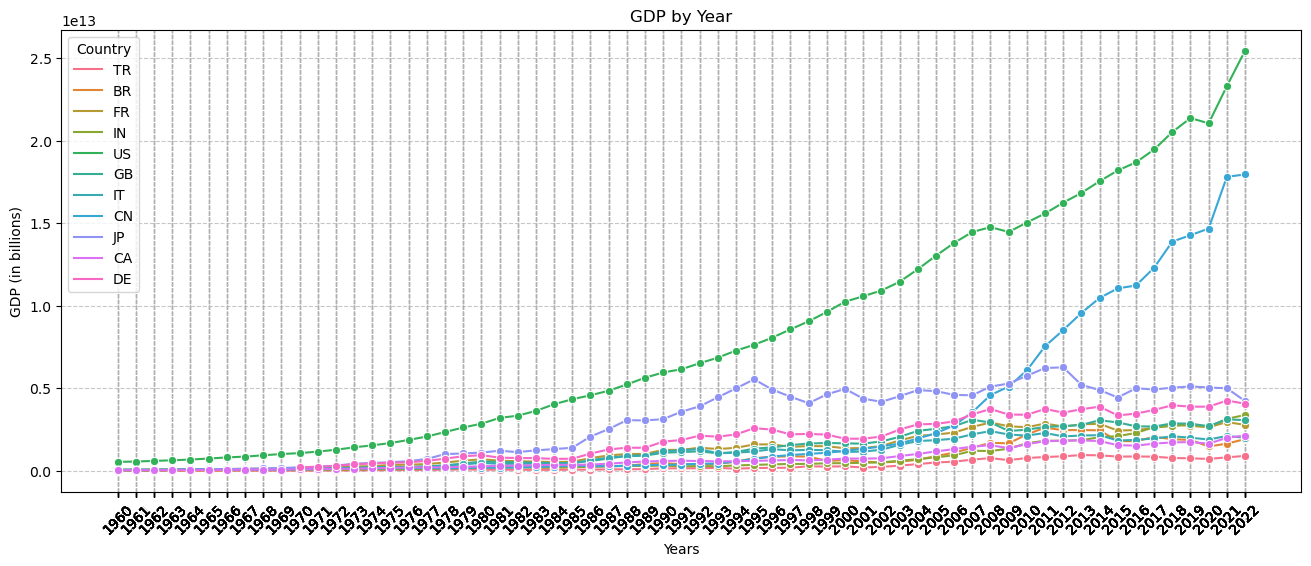

In [11]:
plt.figure(figsize=(16, 6))
sns.lineplot(data= gdp_df, x="Year", y="NY.GDP.MKTP.CD", hue="Country", marker="o", color="b")

plt.title("GDP by Year")
plt.xlabel("Years")
plt.ylabel("GDP (in billions)")
plt.xticks(gdp_df["Year"], rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()


#### 2- Inflation Rate

In [12]:
# Retrieve İnflation Rate data

inf_df = retrieve_data("FP.CPI.TOTL.ZG", countries)
print("İnflation Rate Data:")
print(inf_df)

İnflation Rate Data:
    Country  Year  FP.CPI.TOTL.ZG
0        US  2022           8.003
1        US  2021           4.698
2        US  2020           1.234
3        US  2019           1.812
4        US  2018           2.443
..      ...   ...             ...
688      TR  1964           1.120
689      TR  1963           6.363
690      TR  1962           3.888
691      TR  1961           3.173
692      TR  1960           5.665

[693 rows x 3 columns]


In [13]:
inf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         693 non-null    object 
 1   Year            693 non-null    object 
 2   FP.CPI.TOTL.ZG  645 non-null    float64
dtypes: float64(1), object(2)
memory usage: 16.4+ KB


#### Data cleaning and Pre-processing

Inspect the data for missing values, inconsistencies, or errors. Clean the data by handling missing values, removing duplicates, and ensuring data consistency.

In [14]:
rows_with_null = inf_df[inf_df.isna().any(axis=1)]

print(rows_with_null)

    Country  Year  FP.CPI.TOTL.ZG
99       CN  1986             NaN
100      CN  1985             NaN
101      CN  1984             NaN
102      CN  1983             NaN
103      CN  1982             NaN
104      CN  1981             NaN
105      CN  1980             NaN
106      CN  1979             NaN
107      CN  1978             NaN
108      CN  1977             NaN
109      CN  1976             NaN
110      CN  1975             NaN
111      CN  1974             NaN
112      CN  1973             NaN
113      CN  1972             NaN
114      CN  1971             NaN
115      CN  1970             NaN
116      CN  1969             NaN
117      CN  1968             NaN
118      CN  1967             NaN
119      CN  1966             NaN
120      CN  1965             NaN
121      CN  1964             NaN
122      CN  1963             NaN
123      CN  1962             NaN
124      CN  1961             NaN
125      CN  1960             NaN
609      BR  1980             NaN
610      BR  1

In [15]:
inf_df = inf_df.dropna()

In [16]:
inf_df['Year'] = pd.to_numeric(inf_df['Year'], errors='coerce')

inf_df = inf_df.sort_values(by="Year", ascending=True)

#### Descriptive statistics

In [17]:
inf_df.describe()

Year  FP.CPI.TOTL.ZG
count  645.000         645.000
mean  1992.437          25.098
std     17.946         177.047
min   1960.000          -7.634
25%   1977.000           1.907
50%   1993.000           3.779
75%   2008.000           7.891
max   2022.000        2947.733

In [18]:
inf_df.head()

Country  Year  FP.CPI.TOTL.ZG
692      TR  1960           5.665
440      IN  1960           1.780
566      CA  1960           1.359
62       US  1960           1.458
188      JP  1960           3.575

#### Data visualization

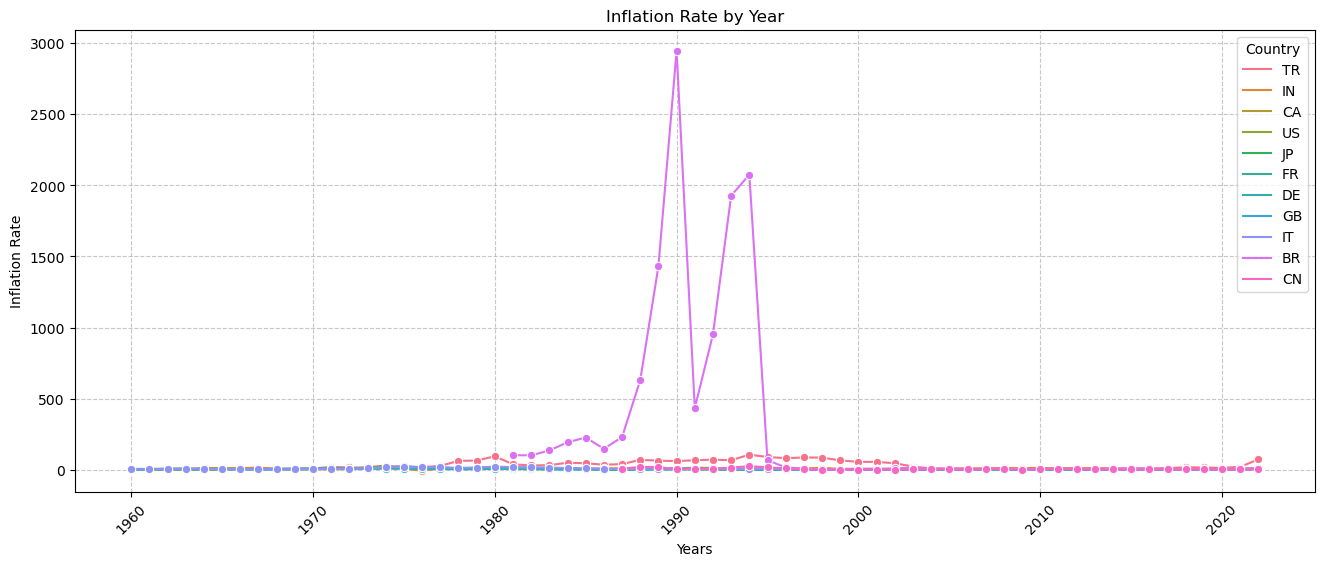

In [19]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=inf_df, x="Year", y="FP.CPI.TOTL.ZG", hue="Country", marker="o", color="b")

plt.title("Inflation Rate by Year")
plt.xlabel("Years")
plt.ylabel("Inflation Rate")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()

Since the outliers in Brazil affect the readability of the graph, let's take another look at the graph by removing Brazil. 
(Note = we removed it only for graphic readability, the reasons for these outliers will be discussed in the solution section later.)

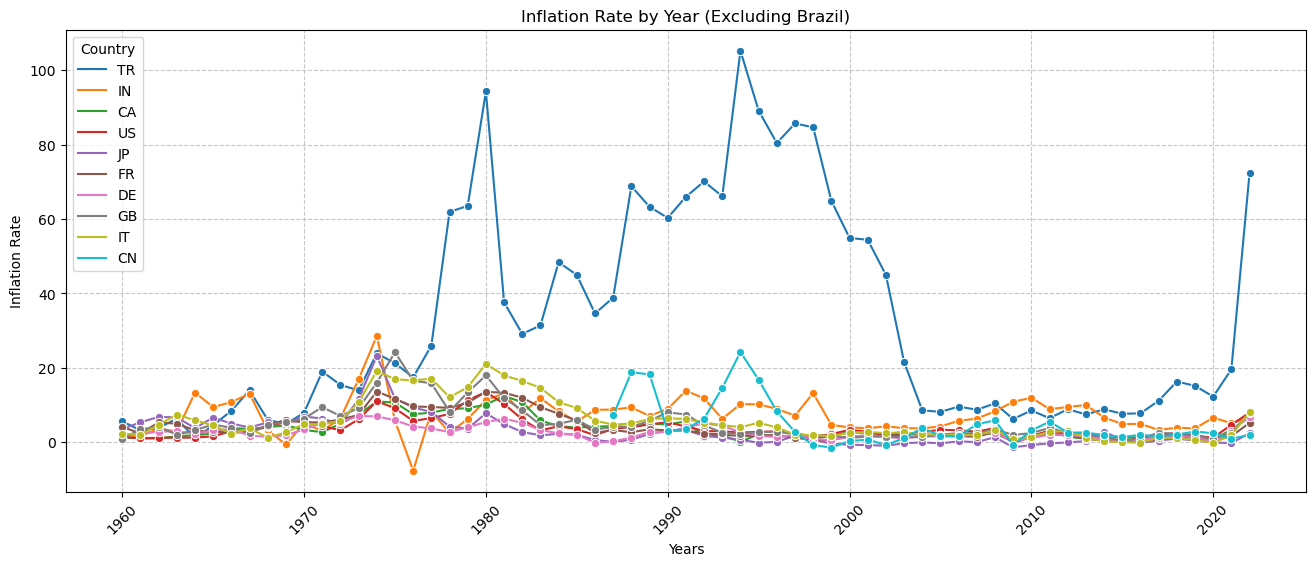

In [20]:
inf_df_filtered = inf_df[inf_df['Country'] != "BR"]

# Create the line plot
plt.figure(figsize=(16, 6))
sns.lineplot(data=inf_df_filtered, x="Year", y="FP.CPI.TOTL.ZG", hue="Country", marker="o", color="b")

plt.title("Inflation Rate by Year (Excluding Brazil)")
plt.xlabel("Years")
plt.ylabel("Inflation Rate")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()



#### 3- Unemployment Rate

In [21]:
# Retrieve Unemployment Rate data

unemp_df = retrieve_data("SL.UEM.TOTL.ZS", countries)
print("Unemployment Rate Data:")
print(unemp_df)

Unemployment Rate Data:
    Country  Year  SL.UEM.TOTL.ZS
0        US  2022           3.611
1        US  2021           5.350
2        US  2020           8.050
3        US  2019           3.670
4        US  2018           3.900
..      ...   ...             ...
688      TR  1964             NaN
689      TR  1963             NaN
690      TR  1962             NaN
691      TR  1961             NaN
692      TR  1960             NaN

[693 rows x 3 columns]


In [22]:
unemp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         693 non-null    object 
 1   Year            693 non-null    object 
 2   SL.UEM.TOTL.ZS  352 non-null    float64
dtypes: float64(1), object(2)
memory usage: 16.4+ KB


#### Data cleaning and Pre-processing

Inspect the data for missing values, inconsistencies, or errors. Clean the data by handling missing values, removing duplicates, and ensuring data consistency.

In [23]:
rows_with_null = unemp_df[unemp_df.isna().any(axis=1)]

print(rows_with_null)

    Country  Year  SL.UEM.TOTL.ZS
32       US  1990             NaN
33       US  1989             NaN
34       US  1988             NaN
35       US  1987             NaN
36       US  1986             NaN
..      ...   ...             ...
688      TR  1964             NaN
689      TR  1963             NaN
690      TR  1962             NaN
691      TR  1961             NaN
692      TR  1960             NaN

[341 rows x 3 columns]


In [24]:
unemp_df = unemp_df.dropna()

In [25]:
unemp_df["Year"] = pd.to_numeric(unemp_df["Year"], errors= "coerce")

unemp_df = unemp_df.sort_values(by="Year", ascending=True)

#### Descriptive statistics

In [26]:
unemp_df.describe()

Year  SL.UEM.TOTL.ZS
count  352.000         352.000
mean  2006.500           7.344
std      9.246           2.685
min   1991.000           2.100
25%   1998.750           4.957
50%   2006.500           7.575
75%   2014.250           9.220
max   2022.000          13.930

In [27]:
unemp_df.head()

Country  Year  SL.UEM.TOTL.ZS
661      TR  1991           8.210
220      DE  1991           5.320
94       CN  1991           2.370
535      CA  1991          10.320
31       US  1991           6.800

#### Data visualization

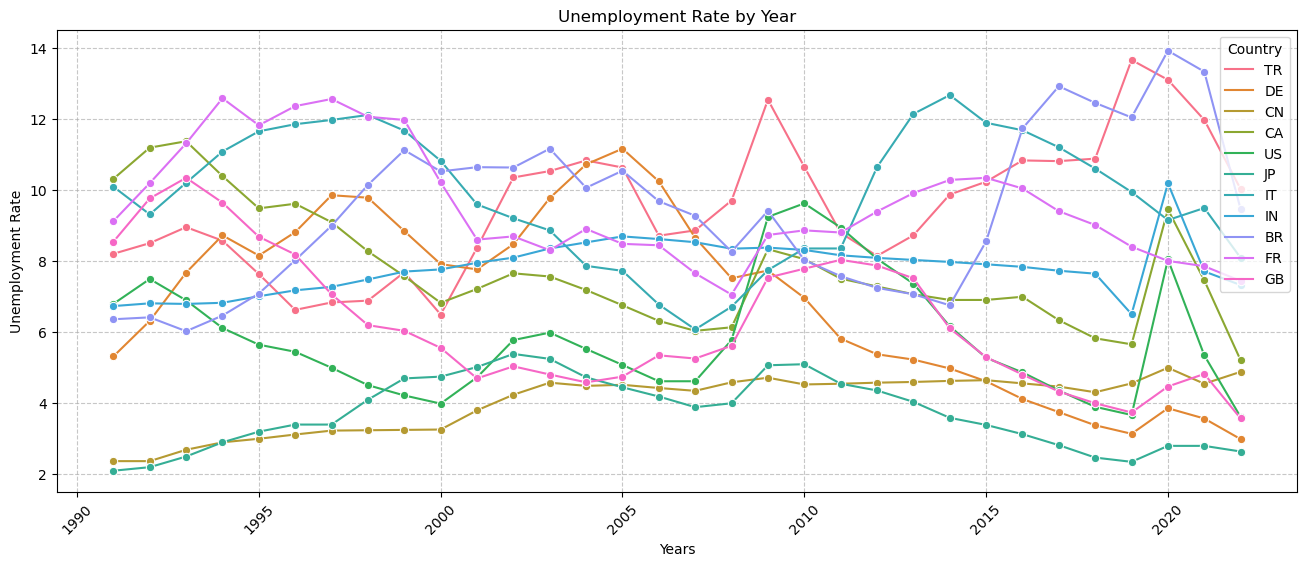

In [28]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=unemp_df, x="Year", y="SL.UEM.TOTL.ZS", hue="Country", marker="o", color="b")

plt.title("Unemployment Rate by Year")
plt.xlabel("Years")
plt.ylabel("Unemployment Rate")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()

#### 4- Government Debt to GDP Ratio

In [29]:
# Retrieve Government Debt to GDP Ratio data

debt_df = retrieve_data("GC.DOD.TOTL.GD.ZS", countries)
print("Government Debt to GDP Ratio Data:")
print(debt_df)

Government Debt to GDP Ratio Data:
    Country  Year  GC.DOD.TOTL.GD.ZS
0        US  2022            115.598
1        US  2021            120.363
2        US  2020            126.244
3        US  2019            100.805
4        US  2018             99.061
..      ...   ...                ...
688      TR  1964                NaN
689      TR  1963                NaN
690      TR  1962                NaN
691      TR  1961                NaN
692      TR  1960                NaN

[693 rows x 3 columns]


In [30]:
debt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            693 non-null    object 
 1   Year               693 non-null    object 
 2   GC.DOD.TOTL.GD.ZS  217 non-null    float64
dtypes: float64(1), object(2)
memory usage: 16.4+ KB


#### Data cleaning and Pre-processing

Inspect the data for missing values, inconsistencies, or errors. Clean the data by handling missing values, removing duplicates, and ensuring data consistency.

In [31]:
rows_with_null = debt_df[debt_df.isna().any(axis=1)]

print(rows_with_null)

    Country  Year  GC.DOD.TOTL.GD.ZS
34       US  1988                NaN
35       US  1987                NaN
36       US  1986                NaN
37       US  1985                NaN
38       US  1984                NaN
..      ...   ...                ...
688      TR  1964                NaN
689      TR  1963                NaN
690      TR  1962                NaN
691      TR  1961                NaN
692      TR  1960                NaN

[476 rows x 3 columns]


In [32]:
debt_df = debt_df.dropna()

In [33]:
debt_df["Year"] = pd.to_numeric(debt_df["Year"], errors="coerce")

debt_df = debt_df.sort_values(by="Year", ascending=True)

#### Descriptive statistics

In [34]:
debt_df.describe()

Year  GC.DOD.TOTL.GD.ZS
count  217.000            217.000
mean  2006.585             77.953
std      9.322             43.069
min   1989.000             20.931
25%   1999.000             49.594
50%   2008.000             60.974
75%   2015.000             95.535
max   2022.000            217.614

In [35]:
debt_df.head()

Country  Year  GC.DOD.TOTL.GD.ZS
33       US  1989             39.128
158      JP  1990             52.894
284      GB  1990             30.203
410      IN  1990             50.783
221      DE  1990             20.931

#### Data visualization

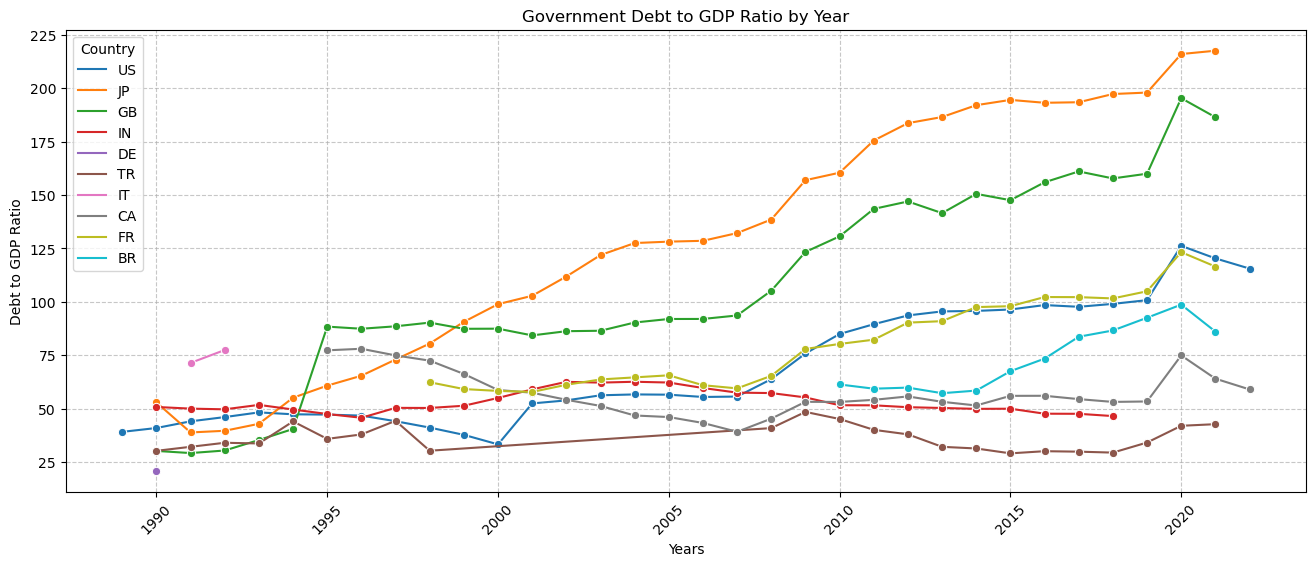

In [36]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=debt_df, x="Year", y="GC.DOD.TOTL.GD.ZS", hue="Country", marker="o", color="b")

plt.title("Government Debt to GDP Ratio by Year")
plt.xlabel("Years")
plt.ylabel("Debt to GDP Ratio")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()

#### 5- Trade Balance 

In [37]:
# Retrieve Trade Balance data

trade_df = retrieve_data("NE.EXP.GNFS.CD", countries)
print("Government Trade Balance Data:")
print(trade_df)

Government Trade Balance Data:
    Country  Year    NE.EXP.GNFS.CD
0        US  2022               NaN
1        US  2021 2539648000000.000
2        US  2020 2148616000000.000
3        US  2019 2538450000000.000
4        US  2018 2538089000000.000
..      ...   ...               ...
688      TR  1964     497833502.401
689      TR  1963     432372505.543
690      TR  1962     498891352.550
691      TR  1961     410199556.541
692      TR  1960     155263717.274

[693 rows x 3 columns]


In [38]:
trade_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         693 non-null    object 
 1   Year            693 non-null    object 
 2   NE.EXP.GNFS.CD  640 non-null    float64
dtypes: float64(1), object(2)
memory usage: 16.4+ KB


#### Data cleaning and Pre-processing

Inspect the data for missing values, inconsistencies, or errors. Clean the data by handling missing values, removing duplicates, and ensuring data consistency.

In [39]:
rows_with_null = trade_df[trade_df.isna().any(axis=1)]

print(rows_with_null)

    Country  Year  NE.EXP.GNFS.CD
0        US  2022             NaN
53       US  1969             NaN
54       US  1968             NaN
55       US  1967             NaN
56       US  1966             NaN
57       US  1965             NaN
58       US  1964             NaN
59       US  1963             NaN
60       US  1962             NaN
61       US  1961             NaN
62       US  1960             NaN
126      JP  2022             NaN
179      JP  1969             NaN
180      JP  1968             NaN
181      JP  1967             NaN
182      JP  1966             NaN
183      JP  1965             NaN
184      JP  1964             NaN
185      JP  1963             NaN
186      JP  1962             NaN
187      JP  1961             NaN
188      JP  1960             NaN
242      DE  1969             NaN
243      DE  1968             NaN
244      DE  1967             NaN
245      DE  1966             NaN
246      DE  1965             NaN
247      DE  1964             NaN
248      DE  1

In [40]:
trade_df = trade_df.dropna()

In [41]:
trade_df["Year"] = pd.to_numeric(trade_df["Year"], errors="coerce")

trade_df = trade_df.sort_values(by="Year", ascending=True)

#### Descriptive statistics

In [42]:
trade_df.describe()

Year    NE.EXP.GNFS.CD
count  640.000           640.000
mean  1993.022  397526768377.048
std     17.158  561898236892.015
min   1960.000     155263717.274
25%   1979.000   32580174144.317
50%   1993.000  186542923848.797
75%   2008.000  536363872182.331
max   2022.000 3714245218685.070

In [43]:
trade_df.head()

Country  Year  NE.EXP.GNFS.CD
692      TR  1960   155263717.274
440      IN  1960  1652701651.396
125      CN  1960  2571280005.942
629      BR  1960  1069822093.954
377      FR  1960  9218097244.953

#### Data visualization

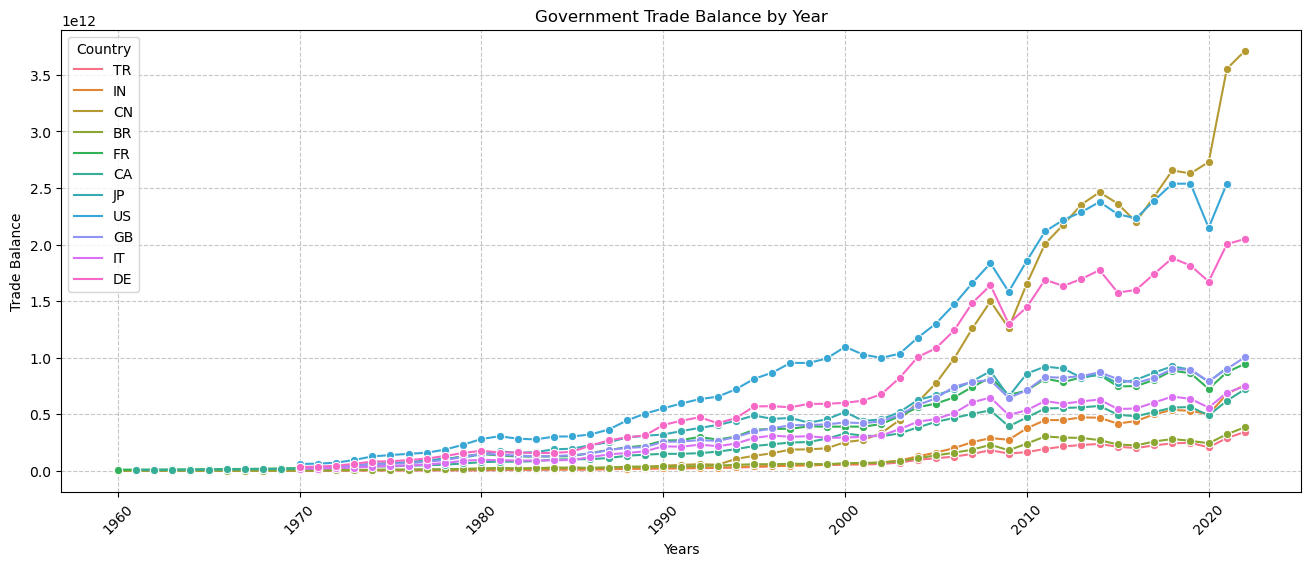

In [44]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=trade_df, x="Year", y="NE.EXP.GNFS.CD", hue="Country", marker="o", color="b")

plt.title("Government Trade Balance by Year")
plt.xlabel("Years")
plt.ylabel("Trade Balance")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()

# QUESTIONS

**1 - What are the key trends and correlations in GDP, inflation rates, and unemployment rates across different countries and regions, 
and how do these indicators collectively contribute to our understanding of the global economic landscape?**

**2 - How does urban population density correlate with the percentage of the urban population living in slums, 
and what are the implications for sustainable urban planning?**

**3 -How do renewable energy consumption, CO2 emissions, and population growth relate to each other across different countries and time periods, and what insights can be gained from these relationships?**

## ANSWER TO THE FIRST QUESTION

In the first part, we have already examined indicator codes such as GDP, inflation rate, unemployment rate, so I will not write the same processes again and proceed directly through the charts.

### Line Plots of GDP, Inflation Rate, Unemployment Rate

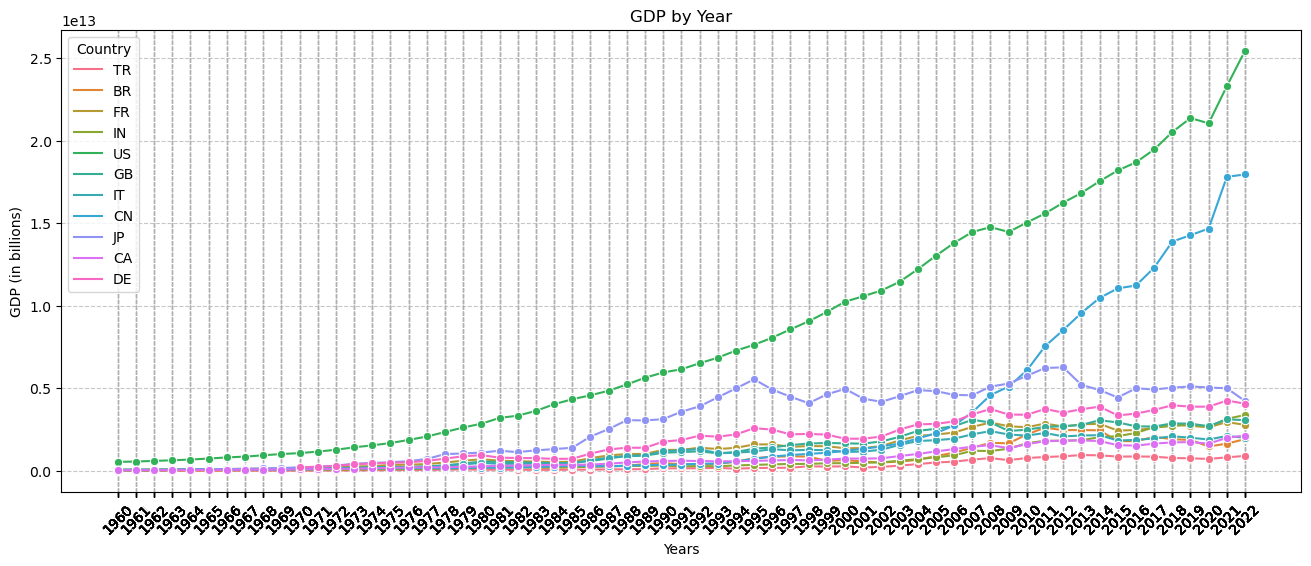

In [45]:
# Line Plot of GDP

plt.figure(figsize=(16, 6))
sns.lineplot(data= gdp_df, x="Year", y="NY.GDP.MKTP.CD", hue="Country", marker="o", color="b")

plt.title("GDP by Year")
plt.xlabel("Years")
plt.ylabel("GDP (in billions)")
plt.xticks(gdp_df["Year"], rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()

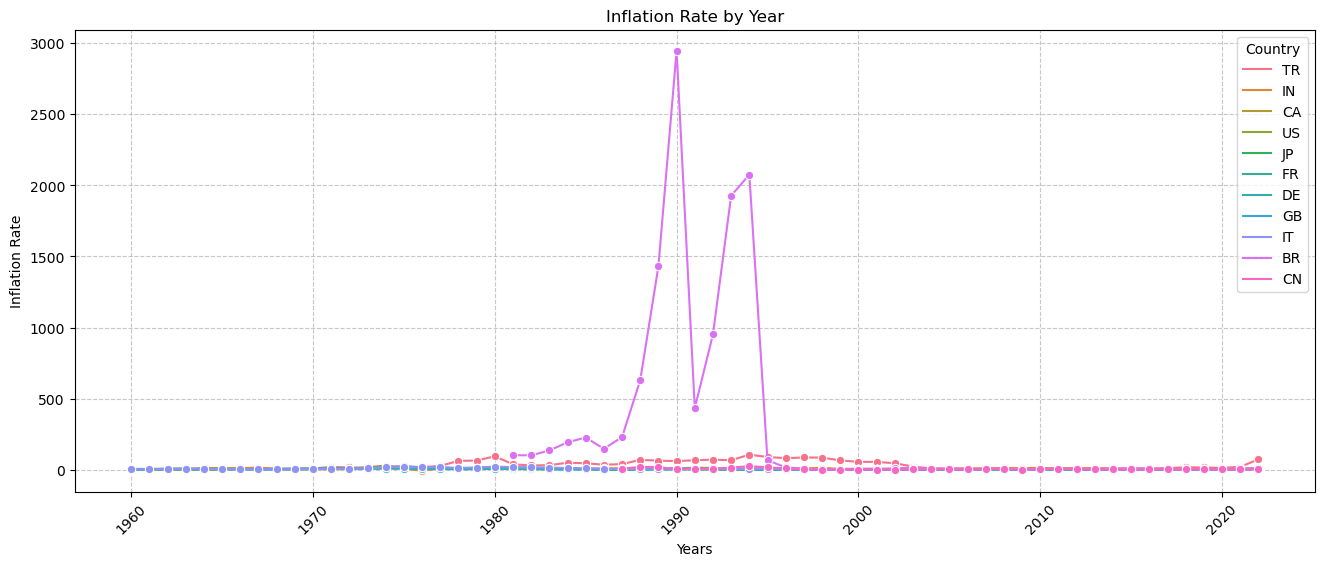

In [46]:
# Line Plot of Inflation Rate

plt.figure(figsize=(16, 6))
sns.lineplot(data=inf_df, x="Year", y="FP.CPI.TOTL.ZG", hue="Country", marker="o", color="b")

plt.title("Inflation Rate by Year")
plt.xlabel("Years")
plt.ylabel("Inflation Rate")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()

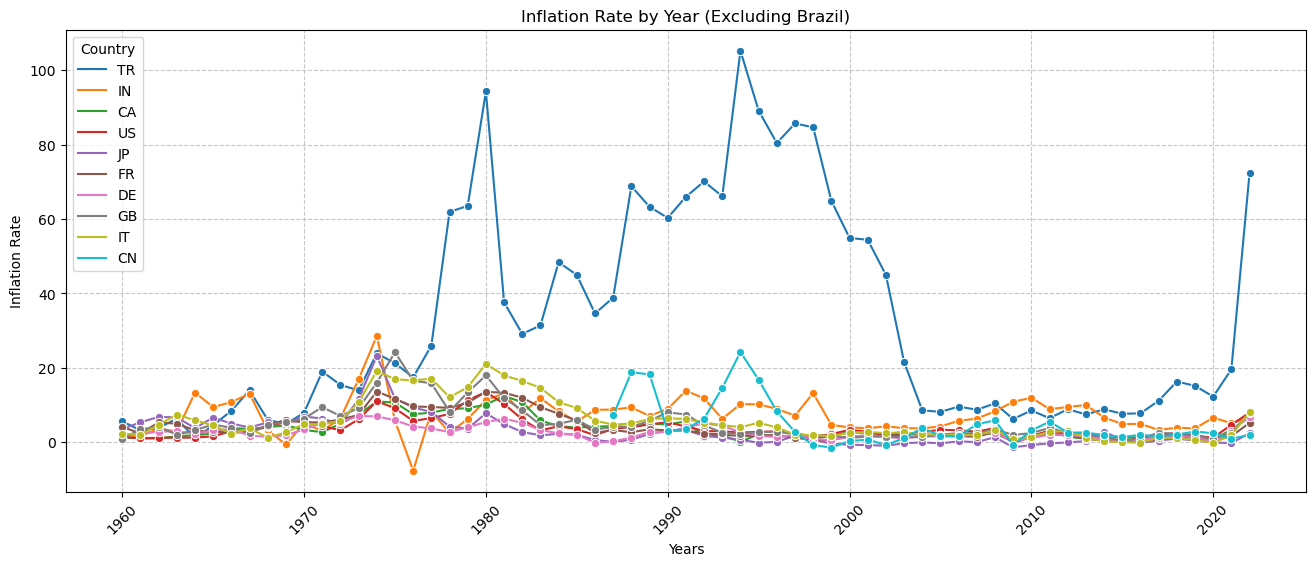

In [47]:
# Line Plot of Inflation Rate (Excluding Brazil!)

inf_df_filtered = inf_df[inf_df['Country'] != "BR"]

# Create the line plot
plt.figure(figsize=(16, 6))
sns.lineplot(data=inf_df_filtered, x="Year", y="FP.CPI.TOTL.ZG", hue="Country", marker="o", color="b")

plt.title("Inflation Rate by Year (Excluding Brazil)")
plt.xlabel("Years")
plt.ylabel("Inflation Rate")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()

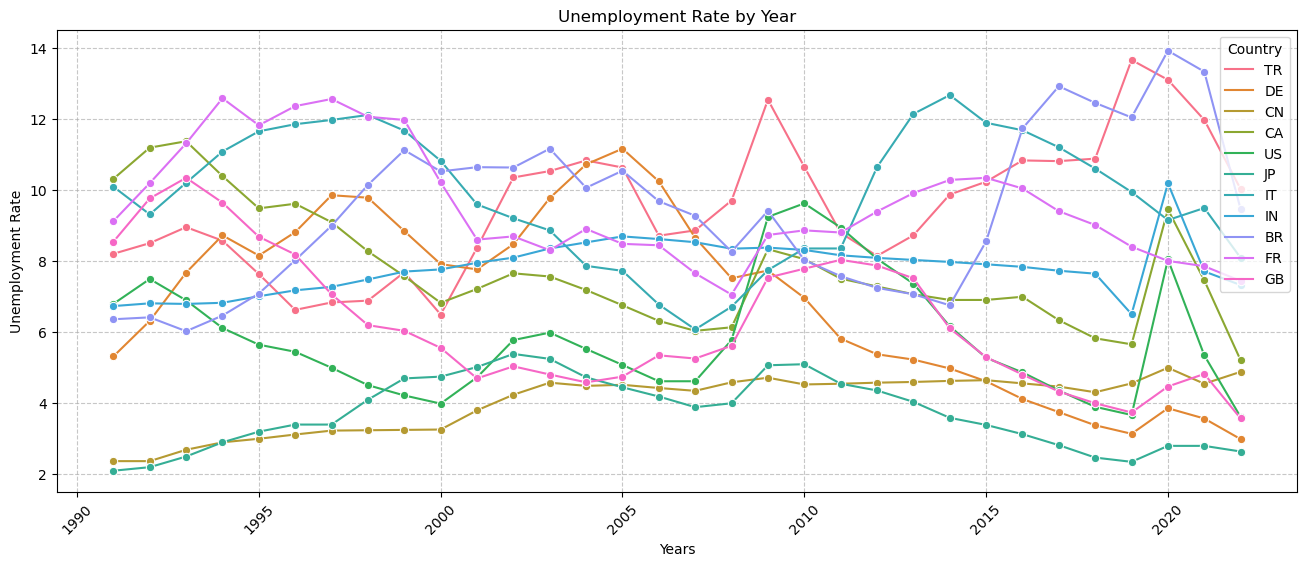

In [48]:
# Line Plot of Unemployment Rate

plt.figure(figsize=(16, 6))
sns.lineplot(data=unemp_df, x="Year", y="SL.UEM.TOTL.ZS", hue="Country", marker="o", color="b")

plt.title("Unemployment Rate by Year")
plt.xlabel("Years")
plt.ylabel("Unemployment Rate")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()

### CORRELATION MATRIX 

A correlation matrix is a table or matrix that summarizes the relationships between multiple variables in a dataset. It quantifies the degree and direction of linear relationships between pairs of variables. Each entry in the correlation matrix, known as a correlation coefficient, provides information about the strength and nature of the relationship between two variables. Correlation coefficients typically range from -1 to 1 and can be used to identify patterns, associations, and dependencies between variables.

In [49]:
# Changing column names to make them more understandable
gdp_df.columns = ['Country', 'Year', 'GDP']
inf_df.columns = ['Country', 'Year', 'Inflation']
unemp_df.columns = ['Country', 'Year', 'Unemployment']

In [50]:
# Filter the dataframes to include only the years 1991-2022
start_year = 1991
end_year = 2022

gdp_df = gdp_df[(gdp_df['Year'] >= start_year) & (gdp_df['Year'] <= end_year)]
inf_df = inf_df[(inf_df['Year'] >= start_year) & (inf_df['Year'] <= end_year)]
unemp_df = unemp_df[(unemp_df['Year'] >= start_year) & (unemp_df['Year'] <= end_year)]

In [51]:
# Merge the filtered dataframes
combined_data = gdp_df.merge(inf_df, on=['Country', 'Year']).merge(unemp_df, on=['Country', 'Year'])

# Calculate the correlation matrix
correlation_matrix = combined_data[['GDP', 'Inflation', 'Unemployment']].corr()

correlation_matrix

GDP  Inflation  Unemployment
GDP           1.000     -0.083        -0.376
Inflation    -0.083      1.000        -0.029
Unemployment -0.376     -0.029         1.000

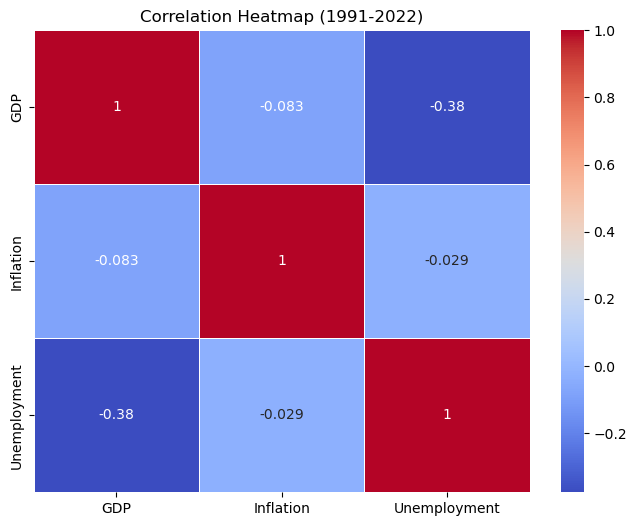

In [52]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (1991-2022)')
plt.show()


### Analysis of Correlation Table

**GDP vs Inflation (-0.084) =** A correlation coefficient of -0.084 suggests a weak negative correlation between GDP and Inflation. The correlation is moderate but not very strong.

**GDP vs Unemployment (-0.376) =** A correlation coefficient of -0.376 suggests a moderate negative correlation between GDP and Unemployment. The negative sign indicates an inverse relationship. The correlation is moderate but not very strong.

**Inflation vs. Unemployment (-0.029) =** A correlation coefficient of -0.029 suggests a very weak negative correlation between Inflation and Unemployment. The correlation is almost non-existent, as the coefficient is very close to zero.

Overall, these correlation coefficients help you understand the relationships between these economic indicators, but they don't imply causation. In other words, while correlations can provide insights into how variables tend to move together or in opposite directions, they don't necessarily explain why these relationships exist or imply a cause-and-effect connection.

### Let's look at the correlation tables by country

C:\Users\HP\AppData\Local\Temp\ipykernel_20276\3813453714.py:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = country_data.corr()
C:\Users\HP\AppData\Local\Temp\ipykernel_20276\3813453714.py:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = country_data.corr()
C:\Users\HP\AppData\Local\Temp\ipykernel_20276\3813453714.py:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = country_data.corr()
C:\Users\HP\AppData\Local

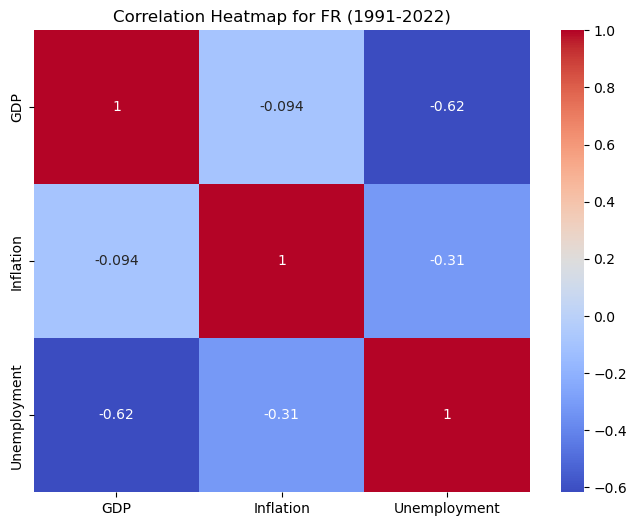

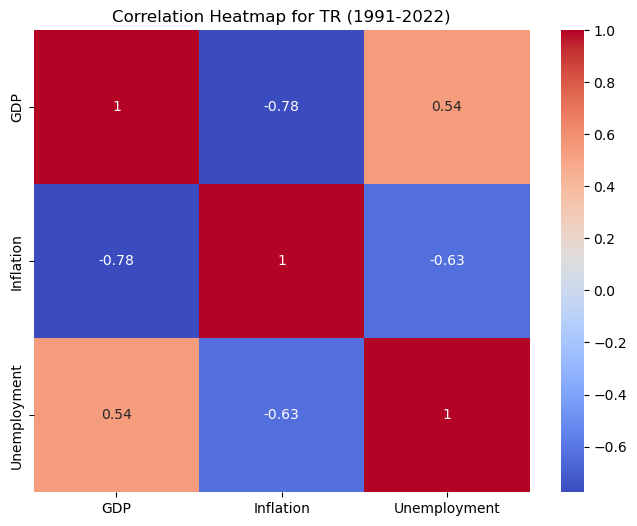

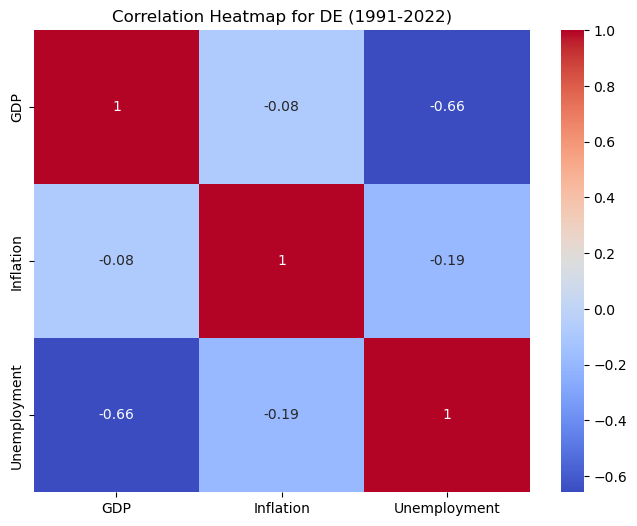

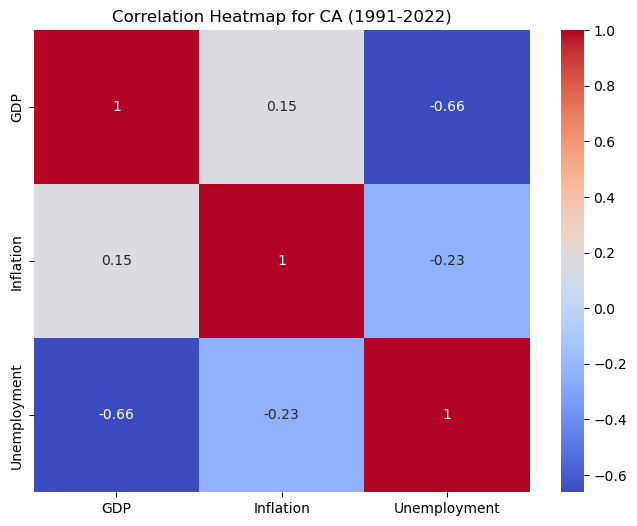

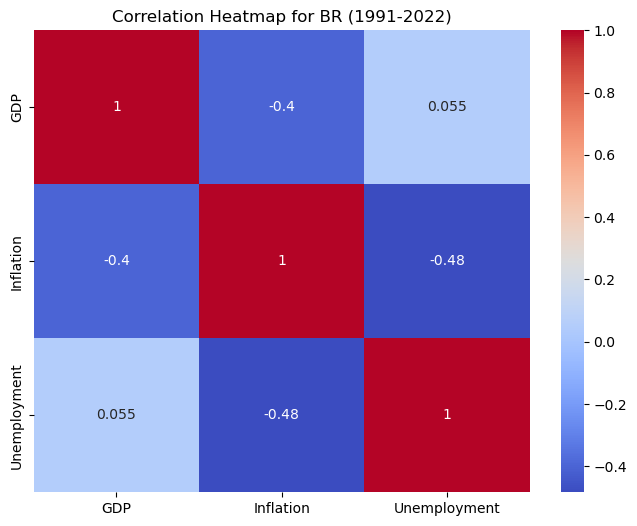

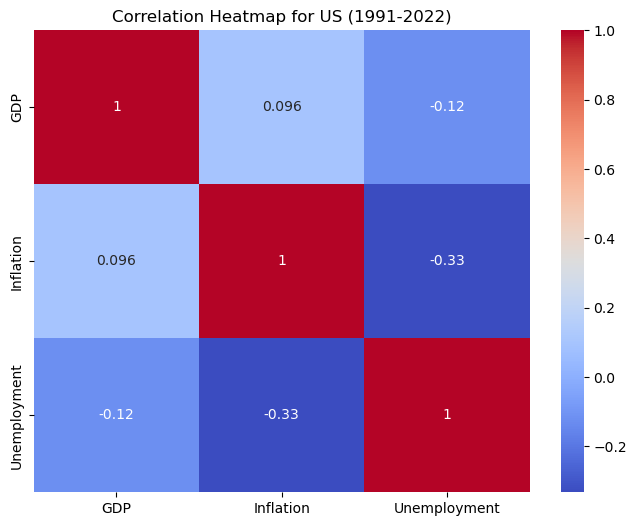

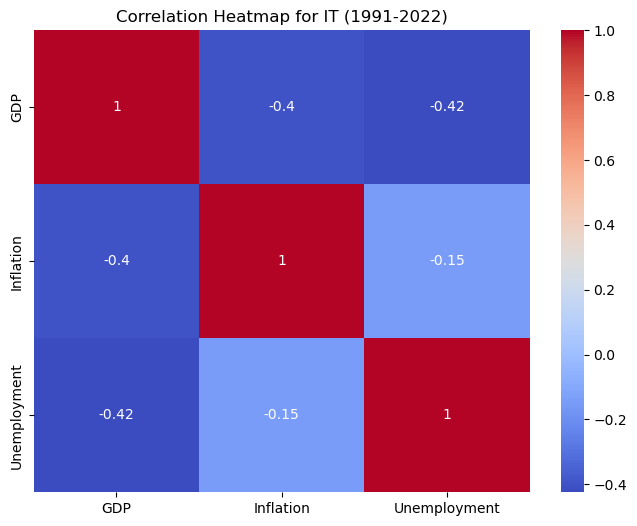

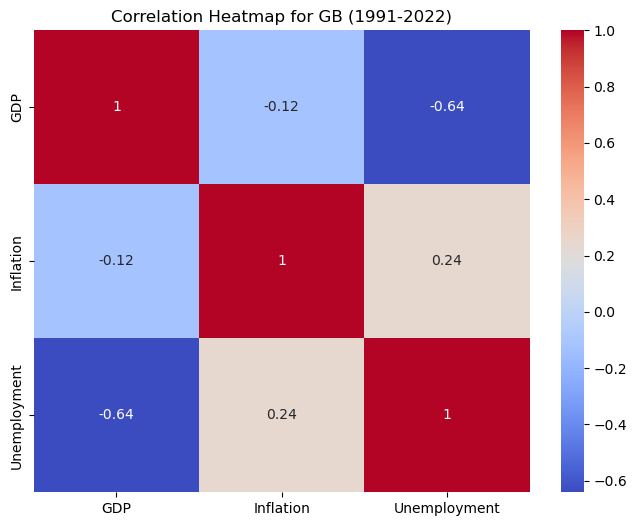

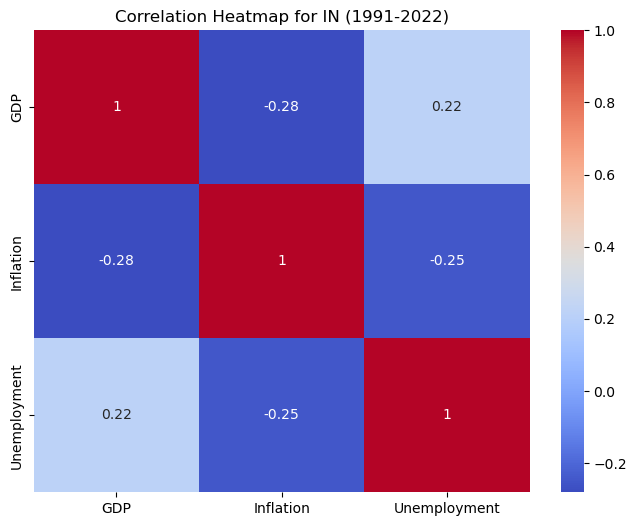

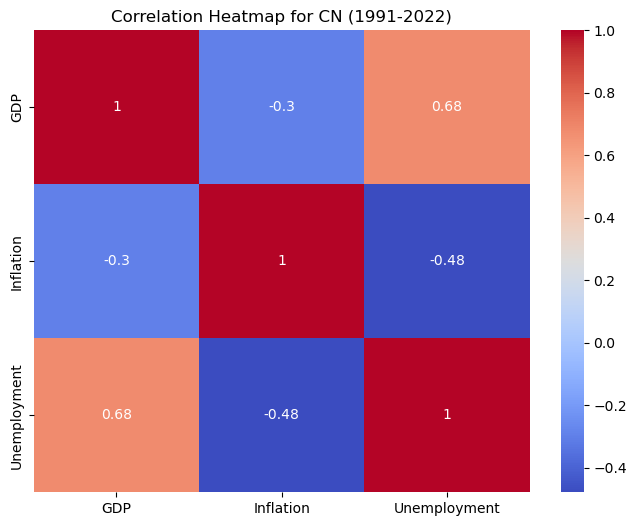

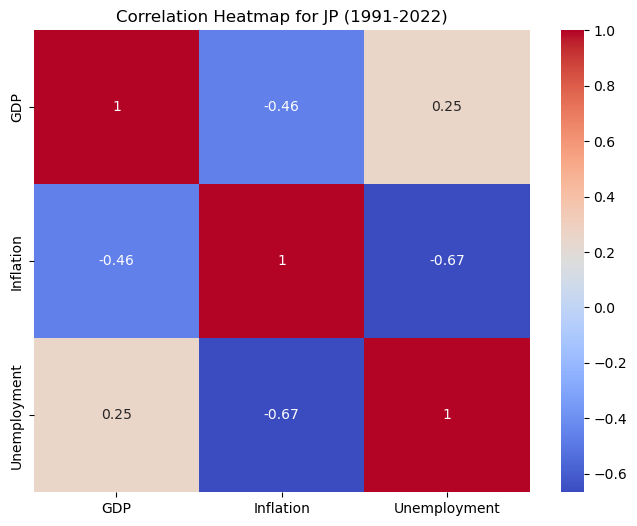

In [53]:
# List of unique countries in the dataset
unique_countries = combined_data['Country'].unique()

# Dictionary to store correlation matrices for each country
correlation_tables = {}

# Filter the data for the years 1991-2022
filtered_combined_data = combined_data[(combined_data['Year'] >= 1991) & (combined_data['Year'] <= 2022)]

# Iterate through each unique country
for country in unique_countries:
    # Create a subset of the data for the current country
    country_data = filtered_combined_data[filtered_combined_data['Country'] == country]
    
    # Calculate the correlation matrix for the current country
    correlation_matrix = country_data.corr()
    
    # Filter to only keep the 3x3 correlation matrix
    correlation_matrix = correlation_matrix.loc[['GDP', 'Inflation', 'Unemployment'], ['GDP', 'Inflation', 'Unemployment']]
    
    # Store the correlation matrix in the dictionary
    correlation_tables[country] = correlation_matrix

# Loop through the correlation tables
for country, correlation_matrix in correlation_tables.items():
    # Create a heatmap for the correlation matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
    plt.title(f"Correlation Heatmap for {country} (1991-2022)")
    plt.show()


# CONCLUSION

### Line Plot of GDP
 While all countries have improved GDP over the years, America always seems to lead the way. While Russia, the other power of a period known as the Cold War, is not included in this list, we can say that America's first close rival is Japan, which started its breakthrough in the late 80s and followed it continuously until 1995. We see that China, which has made its debut since the mid-2000s, has recently become America's closest rival. The conflict between these two new superpowers, which has occupied world politics in recent years, seems likely to continue for a long time.
 
### Line Plot of Inflation Rate and Line Plot of Inflation Rate(Excluding Brazil!)
 There are many reasons for the historical hyperinflation that Brazil experienced in the 90s. Of course, it would be wrong to say that Brazil, which was not politically stable even before the 90s, experienced this only in the 90s. We can say that this historical hyperinflation is the explosion point of the irregularities that have existed since the past. Political impotence, printing of money for foreign debts, international crises are just a few of them. We can see that the 'Real Plan', which was implemented in the mid-90s to prevent this hyperinflation in the 90s, was successful, at least in terms of inflation.
 
 In the graph where we exclude Brazil, we can see that Turkey, which has been dealing with political and social crises for years, although not as much as Brazil, is dealing with inflation more than other countries. In all remaining countries, the inflation rate has exceeded the 20 percent limit maximum 1-2 times, and we can even see that some countries have periods with negative inflation rates.

### Line Plot of Unemployment Rate
 In the unemployment rate table, 2 years stand out with the same trends in all countries: 2009 and 2020. The reasons for these trends are the 2008-2009 Economic Crisis and the Coronavirus epidemic in 2020.
 
### Comparative Analysis of General Correlation Table and Country-by-Country Correlation Tables 
+ Although the correlation tables of France, Germany and Italy are stronger than the general picture in terms of correlation coefficients, they still follow a trend in line with the general picture. 

+ Although we see the relationships between "GDP" and "Inflation" and "Inflation" and "Unemployment" in the Turkey table as being in line with the general picture but stronger, the relationship between "GDP" and "Unemployment" has completely changed from a negative correlation to a positive correlation.The change in the correlation between "GDP" and "Unemployment" in the Turkey table from negative to positive may indicate a fundamental change in the relationship. This change may result from various economic factors, policy changes, or data collection methods.We see the same changes in the correlation tables of Brazil, India, Japan and China, although of different magnitudes.

+ In the Canadian correlation table, the change between "GDP" and "Unemployment" and between "Inflation" and "Unemployment" remained in the same direction as the general correlation table and changed in magnitude. The change between "GDP" and "Inflation" turned from negative to positive. This change may result from various economic factors, policy changes, or data collection methods. America's correlation table exhibited the same trend at different magnitudes.

+ In the correlation table of Great Britain, although the values of "GDP" and "Inflation" and "GDP" and "Unemployment" have changed in the same direction compared to the general correlation table, the relationship between "Inflation" and "Unemployment" has also changed direction differently. These differences may be due to a variety of factors, such as economic conditions, policies or data differences specific to Great Britain. 

+ As a result, when we look at the value differences, we can see that the country that deviates the most from the general correlation table is Turkey. To better understand these change anomalies, things such as periodic research, researching data sources, examining external events can be done.


## ANSWER TO THE SECOND QUESTION

The variables we will use when explaining this question are "EN.POP.DNST" (population density), "SP.URB.TOTL.IN.ZS" (ratio of urban population to total population) and "EN.URB. MCTY.TL.ZS" (total urban population living in the capital as a percentage of the urban population).

In [54]:
# Retrive Urban Population % of Total Population data

urban_df = retrieve_data("SP.URB.TOTL.IN.ZS", countries)
print("Urban Population % of Total Population Data:")
print(urban_df)

Urban Population % of Total Population Data:
    Country  Year  SP.URB.TOTL.IN.ZS
0        US  2022             83.084
1        US  2021             82.873
2        US  2020             82.664
3        US  2019             82.459
4        US  2018             82.256
..      ...   ...                ...
688      TR  1964             33.680
689      TR  1963             33.137
690      TR  1962             32.598
691      TR  1961             32.064
692      TR  1960             31.515

[693 rows x 3 columns]


In [55]:
urban_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            693 non-null    object 
 1   Year               693 non-null    object 
 2   SP.URB.TOTL.IN.ZS  693 non-null    float64
dtypes: float64(1), object(2)
memory usage: 16.4+ KB


#### Data cleaning and Pre-processing

Inspect the data for missing values, inconsistencies, or errors. Clean the data by handling missing values, removing duplicates, and ensuring data consistency.

In [56]:
# No null values

In [57]:
urban_df["Year"] = pd.to_numeric(urban_df["Year"], errors="coerce")

urban_df = urban_df.sort_values(by="Year", ascending=True)

#### Descriptive statistics

In [58]:
urban_df.describe()

Year  SP.URB.TOTL.IN.ZS
count  693.000            693.000
mean  1991.000             64.884
std     18.197             19.936
min   1960.000             16.203
25%   1975.000             60.518
50%   1991.000             73.103
75%   2007.000             77.881
max   2022.000             91.955

In [59]:
urban_df.head()

Country  Year  SP.URB.TOTL.IN.ZS
692      TR  1960             31.515
62       US  1960             69.996
566      CA  1960             69.061
125      CN  1960             16.203
503      IT  1960             59.361

#### Data visualization

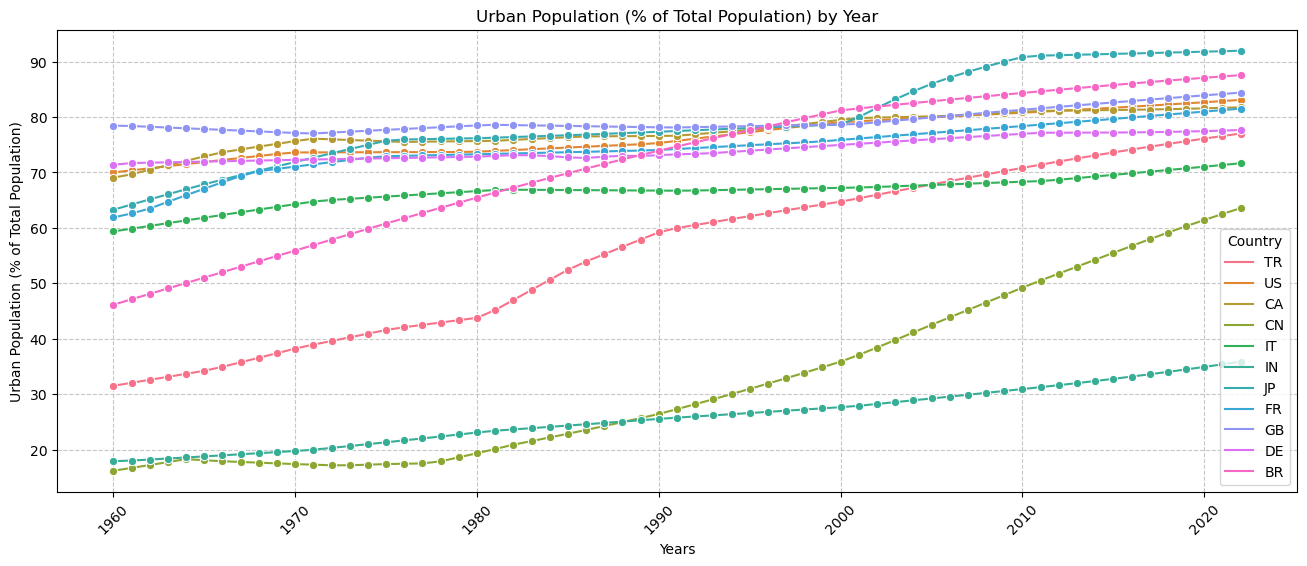

In [60]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=urban_df, x="Year", y="SP.URB.TOTL.IN.ZS", hue="Country", marker="o", color="b")

plt.title("Urban Population (% of Total Population) by Year")
plt.xlabel("Years")
plt.ylabel("Urban Population (% of Total Population)")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()

In [61]:
# Retrive Population Density - People per sq. km of Land Area data

pop_density_df = retrieve_data("EN.POP.DNST", countries)
print("Population Density - People per sq. km of Land Area Data:")
print(pop_density_df)

Population Density - People per sq. km of Land Area Data:
    Country  Year  EN.POP.DNST
0        US  2022          NaN
1        US  2021       36.298
2        US  2020       36.241
3        US  2019       35.893
4        US  2018       35.730
..      ...   ...          ...
688      TR  1964       39.776
689      TR  1963       38.756
690      TR  1962       37.724
691      TR  1961       36.712
692      TR  1960          NaN

[693 rows x 3 columns]


In [62]:
pop_density_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      693 non-null    object 
 1   Year         693 non-null    object 
 2   EN.POP.DNST  671 non-null    float64
dtypes: float64(1), object(2)
memory usage: 16.4+ KB


#### Data cleaning and Pre-processing

Inspect the data for missing values, inconsistencies, or errors. Clean the data by handling missing values, removing duplicates, and ensuring data consistency.

In [63]:
rows_with_null = pop_density_df[pop_density_df.isna().any(axis=1)]

print(rows_with_null)

    Country  Year  EN.POP.DNST
0        US  2022          NaN
62       US  1960          NaN
63       CN  2022          NaN
125      CN  1960          NaN
126      JP  2022          NaN
188      JP  1960          NaN
189      DE  2022          NaN
251      DE  1960          NaN
252      GB  2022          NaN
314      GB  1960          NaN
315      FR  2022          NaN
377      FR  1960          NaN
378      IN  2022          NaN
440      IN  1960          NaN
441      IT  2022          NaN
503      IT  1960          NaN
504      CA  2022          NaN
566      CA  1960          NaN
567      BR  2022          NaN
629      BR  1960          NaN
630      TR  2022          NaN
692      TR  1960          NaN


In [64]:
pop_density_df = pop_density_df.dropna()

In [65]:
pop_density_df["Year"] = pd.to_numeric(pop_density_df["Year"], errors="coerce")

pop_density_df = pop_density_df.sort_values(by="Year", ascending=True)

#### Descriptive statistics

In [66]:
pop_density_df.describe()

Year  EN.POP.DNST
count  671.000      671.000
mean  1991.000      149.029
std     17.620      115.498
min   1961.000        2.038
25%   1976.000       32.723
50%   1991.000      123.731
75%   2006.000      232.770
max   2021.000      473.419

In [67]:
pop_density_df.head()

Country  Year  EN.POP.DNST
691      TR  1961       36.712
61       US  1961       20.056
565      CA  1961        2.038
124      CN  1961       70.336
502      IT  1961      171.828

#### Data visualization

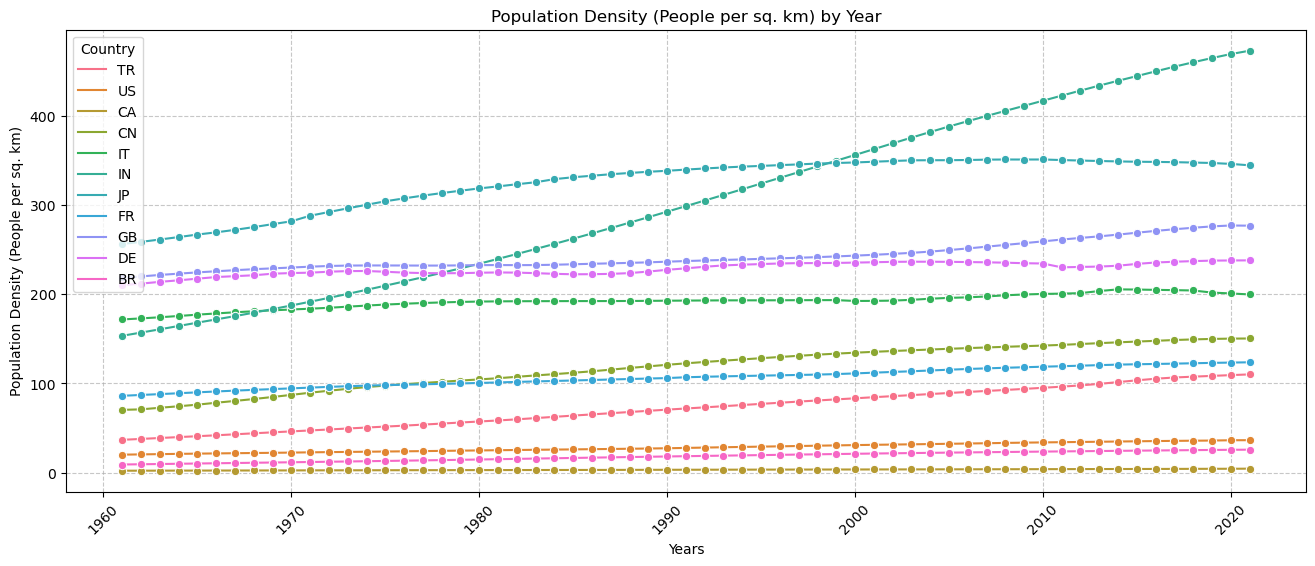

In [68]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=pop_density_df, x="Year", y="EN.POP.DNST", hue="Country", marker="o", color="b")

plt.title("Population Density (People per sq. km) by Year")
plt.xlabel("Years")
plt.ylabel("Population Density (People per sq. km)")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()

In [69]:
# Retrieve Urban Population Living in Slums (% of Urban Population) data

slums_df = retrieve_data("EN.URB.MCTY.TL.ZS", countries)
print("Urban Population Living in Slums (% of Urban Population) Data:")
print(slums_df)

Urban Population Living in Slums (% of Urban Population) Data:
    Country  Year  EN.URB.MCTY.TL.ZS
0        US  2022             46.961
1        US  2021             46.732
2        US  2020             46.412
3        US  2019             46.474
4        US  2018             46.305
..      ...   ...                ...
688      TR  1964             14.315
689      TR  1963             13.706
690      TR  1962             13.140
691      TR  1961             12.602
692      TR  1960             12.174

[693 rows x 3 columns]


In [70]:
slums_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            693 non-null    object 
 1   Year               693 non-null    object 
 2   EN.URB.MCTY.TL.ZS  693 non-null    float64
dtypes: float64(1), object(2)
memory usage: 16.4+ KB


#### Data cleaning and Pre-processing

Inspect the data for missing values, inconsistencies, or errors. Clean the data by handling missing values, removing duplicates, and ensuring data consistency.

In [71]:
# No null values

In [72]:
slums_df["Year"] = pd.to_numeric(slums_df["Year"], errors="coerce")

slums_df = slums_df.sort_values(by="Year", ascending=True)

#### Descriptive statistics

In [73]:
slums_df.describe()

Year  EN.URB.MCTY.TL.ZS
count  693.000            693.000
mean  1991.000             27.535
std     18.197             14.767
min   1960.000              7.629
25%   1975.000             16.133
50%   1991.000             25.546
75%   2007.000             39.202
max   2022.000             65.075

In [74]:
slums_df.head()

Country  Year  EN.URB.MCTY.TL.ZS
692      TR  1960             12.174
62       US  1960             38.733
566      CA  1960             30.098
125      CN  1960              8.123
503      IT  1960             15.851

#### Data visualization

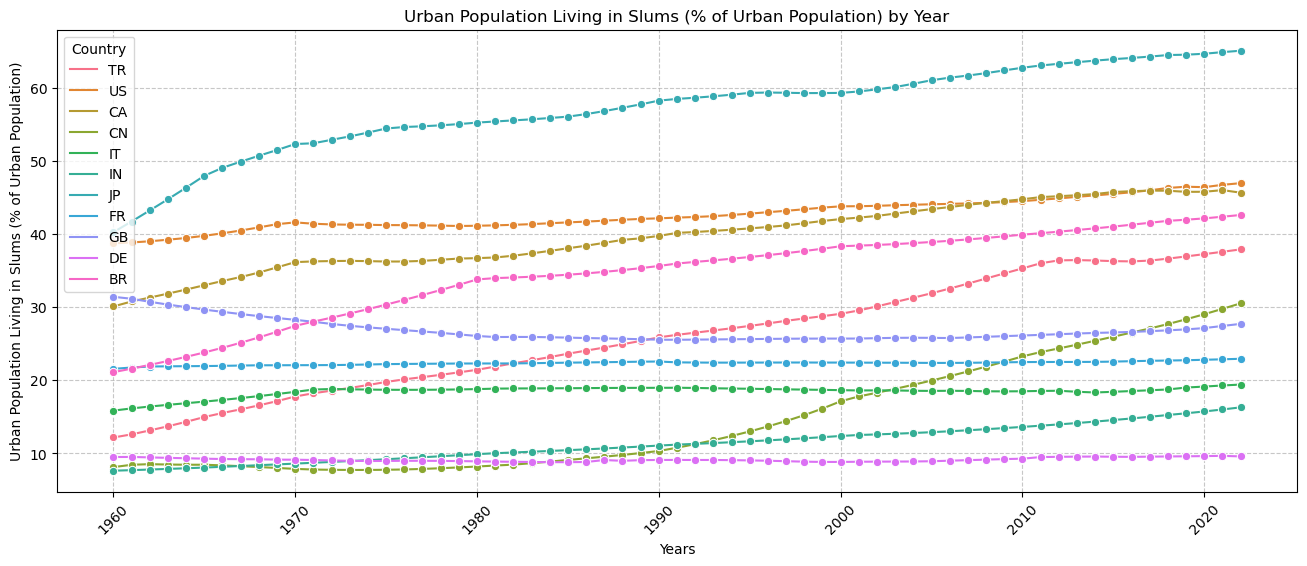

In [75]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=slums_df, x="Year", y="EN.URB.MCTY.TL.ZS", hue="Country", marker="o", color="b")

plt.title("Urban Population Living in Slums (% of Urban Population) by Year")
plt.xlabel("Years")
plt.ylabel("Urban Population Living in Slums (% of Urban Population)")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()

### CORRELATION MATRIX 

In [76]:
# Changing column names to make them more understandable
urban_df.columns = ['Country', 'Year', 'Urban_Pop_Rate']
pop_density_df.columns = ['Country', 'Year', 'Pop_Density_Rate']
slums_df.columns = ['Country', 'Year', 'Slums_Urban_Rate']

In [77]:
# Filter the dataframes to include only the years 1991-2022
start_year = 1961
end_year = 2021

urban_df = urban_df[(urban_df['Year'] >= start_year) & (urban_df['Year'] <= end_year)]
pop_density_df = pop_density_df[(pop_density_df['Year'] >= start_year) & (pop_density_df['Year'] <= end_year)]
slums_df = slums_df[(slums_df['Year'] >= start_year) & (slums_df['Year'] <= end_year)]

In [78]:
# Merge the filtered dataframes
combined_data = urban_df.merge(pop_density_df, on=['Country', 'Year']).merge(slums_df, on=['Country', 'Year'])

# Calculate the correlation matrix
correlation_matrix = combined_data[['Urban_Pop_Rate', 'Pop_Density_Rate', 'Slums_Urban_Rate']].corr()

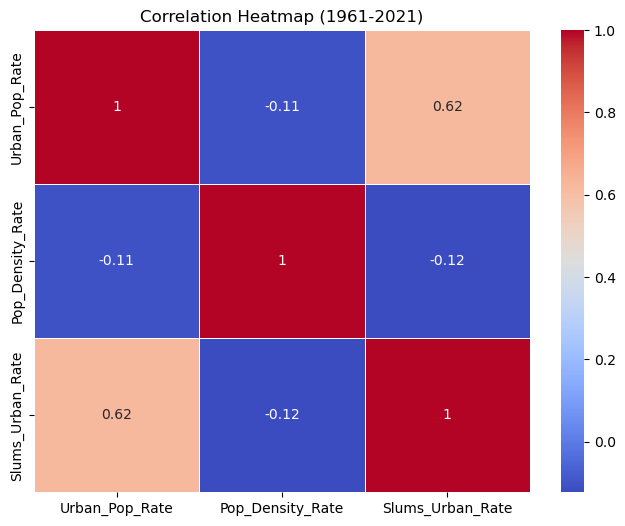

In [79]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (1961-2021)')
plt.show()

### Analysis of Correlation Table

**Urban_Pop_Rate vs Pop_Density_Rate (-0.108) =** A correlation coefficient of -0.108 indicates a weak negative correlation between Urban Population Rate and Population Density Rate. The correlation is very weak and the negative sign indicates a slight downward trend in the Population Density Ratio as the Urban Population Ratio increases.

**Urban_Pop_Rate vs Slums_Urban_Rate (0.619) =** 0.619 indicates a strong positive correlation between the Urban Population Rate and the Proportion of Urban Population Living in Slums. The positive sign indicates that there is a significant upward trend in Slum_Urban_Rate as the Urban Population Ratio increases.

**Pop_Density_Rate vs Slums_Urban_Rate (-0.123) =** -0.123 indicates a weak negative correlation between the Population Density Rate and the Proportion of Urban Population Living in Slums. The correlation is very weak and the negative sign indicates a slight downward trend in the Slum_Urban_Ratio as the Population Density Ratio increases.

Overall, these correlation coefficients provide insight into the relationships between these urbanization indicators but do not imply causality. In other words, although correlations show how variables tend to move together or in opposite directions, they may not explain why these relationships exist or indicate a cause-effect relationship.

### Let's look at the correlation tables by country

C:\Users\HP\AppData\Local\Temp\ipykernel_20276\1321250602.py:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = country_data.corr()
C:\Users\HP\AppData\Local\Temp\ipykernel_20276\1321250602.py:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = country_data.corr()
C:\Users\HP\AppData\Local\Temp\ipykernel_20276\1321250602.py:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = country_data.corr()
C:\Users\HP\AppData\Local

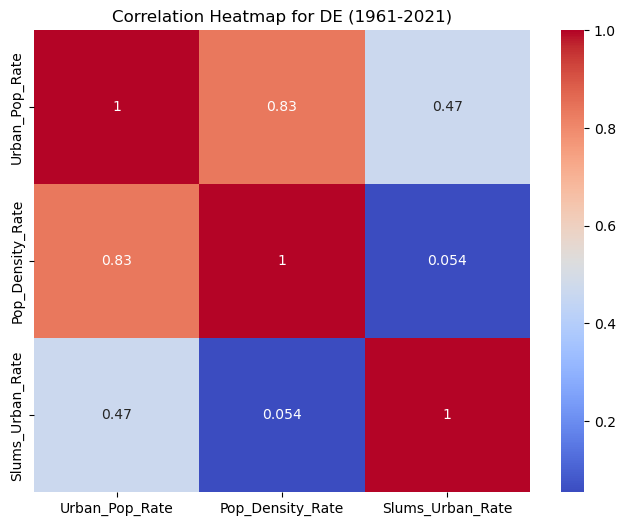

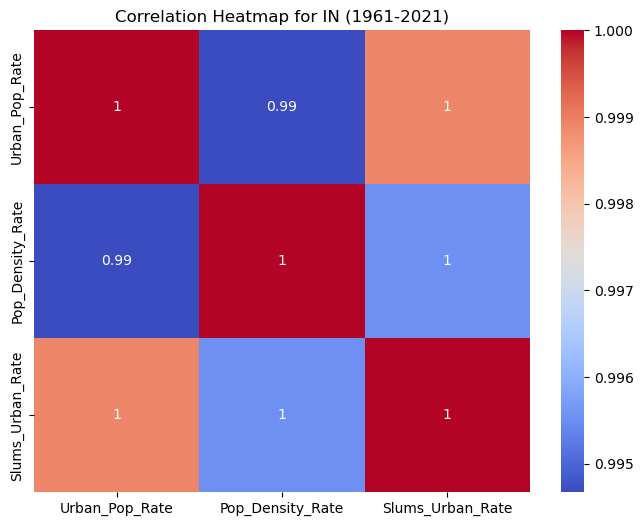

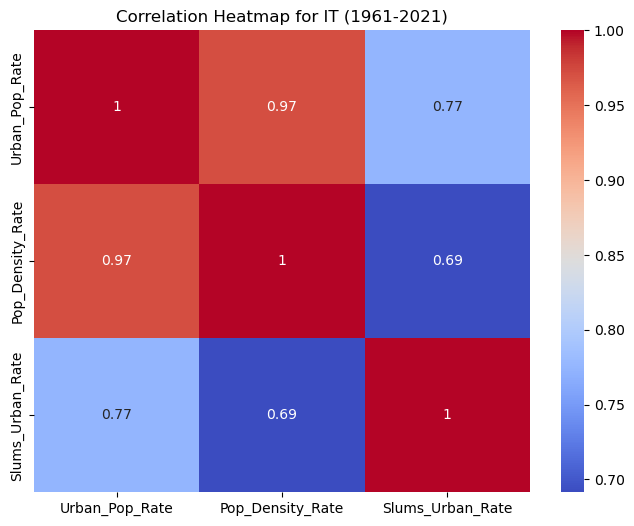

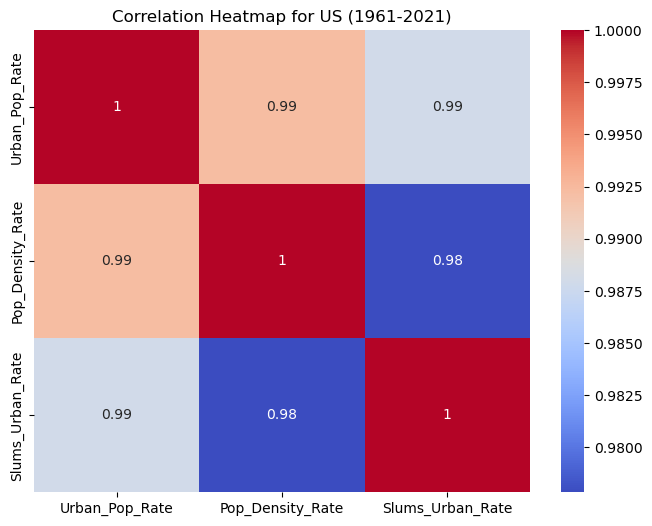

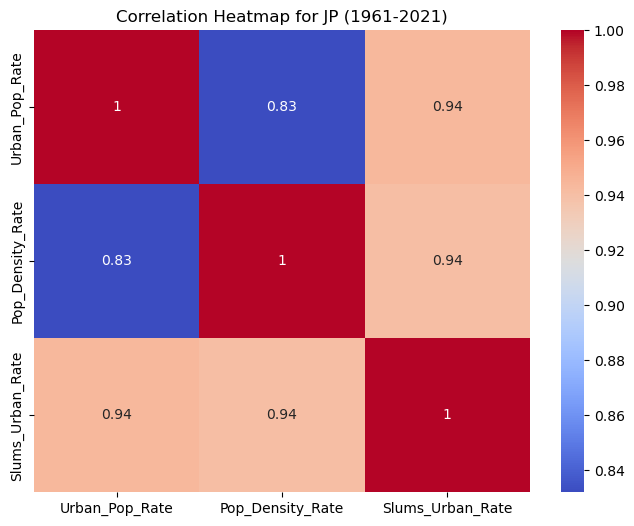

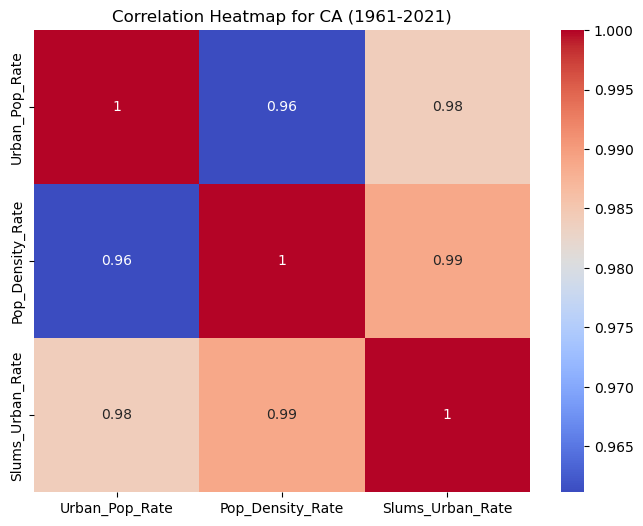

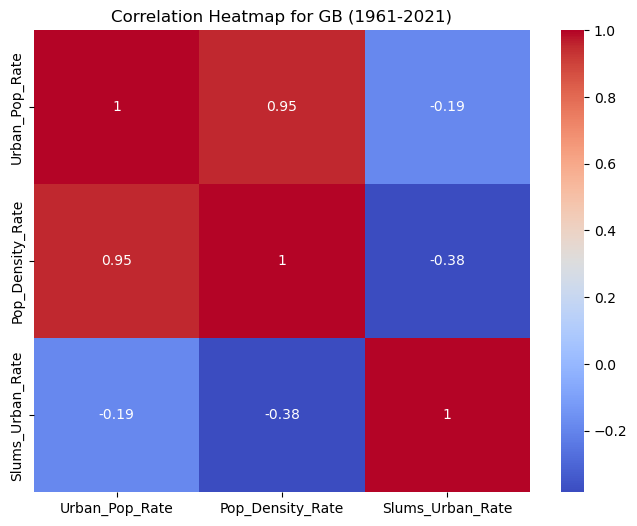

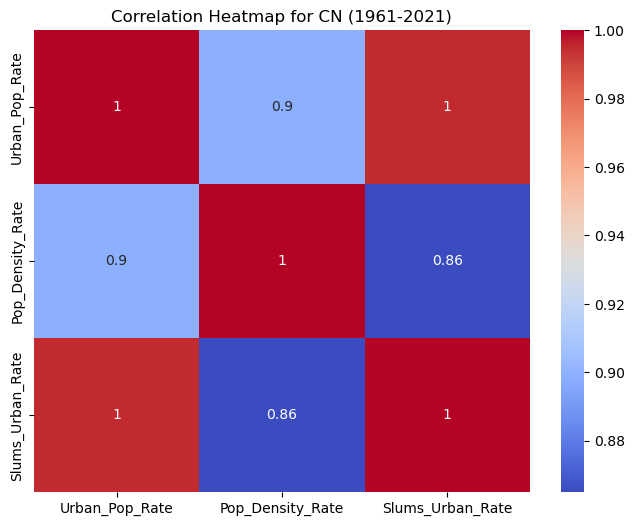

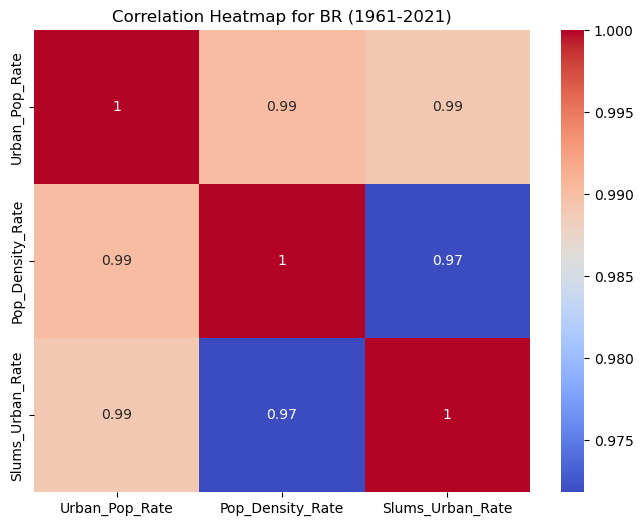

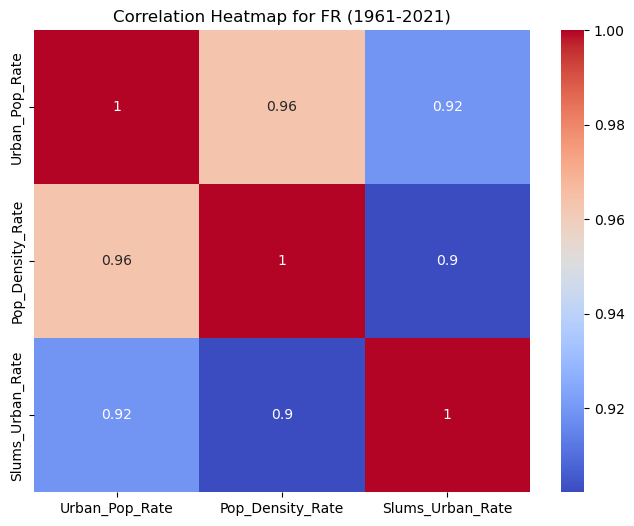

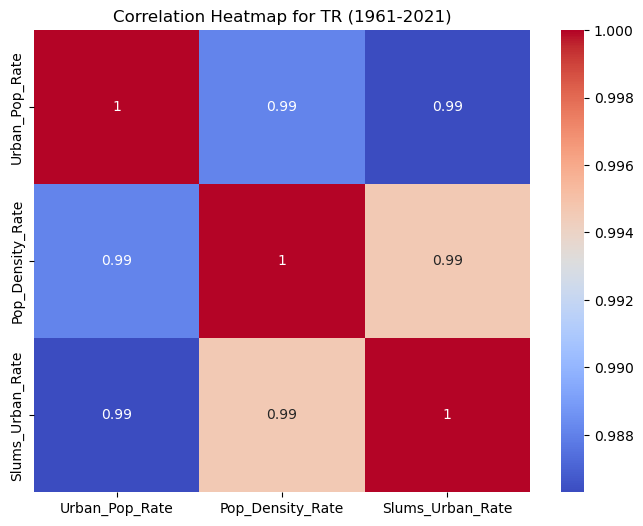

In [80]:
# List of unique countries in the dataset
unique_countries = combined_data['Country'].unique()

# Dictionary to store correlation matrices for each country
correlation_tables = {}

# Filter the data for the years 1991-2022
filtered_combined_data = combined_data[(combined_data['Year'] >= 1961) & (combined_data['Year'] <= 2021)]

# Iterate through each unique country
for country in unique_countries:
    # Create a subset of the data for the current country
    country_data = filtered_combined_data[filtered_combined_data['Country'] == country]
    
    # Calculate the correlation matrix for the current country
    correlation_matrix = country_data.corr()
    
    # Filter to only keep the 3x3 correlation matrix
    correlation_matrix = correlation_matrix.loc[['Urban_Pop_Rate', 'Pop_Density_Rate', 'Slums_Urban_Rate'], 
                                                ['Urban_Pop_Rate', 'Pop_Density_Rate', 'Slums_Urban_Rate']]
    
    # Store the correlation matrix in the dictionary
    correlation_tables[country] = correlation_matrix

# Now you have separate correlation tables for each country in the `correlation_tables` dictionary.

# Loop through the correlation tables and create heatmaps
for country, correlation_matrix in correlation_tables.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
    plt.title(f"Correlation Heatmap for {country} (1961-2021)")
    plt.show()


# CONCLUSION

### Line Plot of Urban Population (% of Total Population) by Year
 This indicator expresses the percentage of the total population living in urban areas. It measures the degree of urbanization in a country. A higher value indicates a larger proportion of the population living in urban areas. When we look at this graph, we can see that the urbanization rate has increased over the years in all countries and is still increasing. We can say that the notable parts of the graph are that Japan, which is the leader in urbanization, is the only country with a rate above 90 percent, and that Brazil, Turkey and China are on a much faster rise with their urbanization investments.
 
### Line Plot of Population Density (People per sq. km) by Year
 This indicator represents population density, measured as the number of people per square kilometer. It provides information about the concentration of population in a particular geographic area. Higher population density values indicate more densely populated areas. Although all countries in the chart generally show a slight increase or continue on the same course, the country that stands out here is India. India, which has grown more than twice since the first date of data collection, has reached an alarming point in terms of human density per square kilometer.
 
### Line Plot of Urban Population Living in Slums (% of Urban Population) by Year
 This indicator expresses the percentage of the urban population living in slums. It measures the proportion of the urban population residing in areas characterized by inadequate housing, lack of access to clean water, and poor sanitation. A higher value of this indicator indicates that a larger percentage of the urban population lives in substandard conditions. In this graph, Japan, which has the highest urbanization rate, ranks first again, and we can see that Brazil, Turkey and China, which also increase at a high rate of urbanization rate, continue to rise in this graph. The most important conclusion that can be drawn from here is to see that rapid urbanization does not always produce positive results. Rapid urbanization also leads to rapid slum development in a place.

### Comparative Analysis of General Correlation Table and Country-by-Country Correlation Tables 
+ In the correlation tables of Turkey, France, Brazil, China, Italy, Canada, Japan, America and India, the coefficients between all indicators almost reach one, which is the absolute correlation coefficient. These changes in correlations may have implications for urban planning. Strong correlations indicate that there is a strong trend for cities to become more dense as urbanization increases, potentially leading to housing and infrastructure challenges. A higher correlation with slum populations may indicate problems with housing conditions and living standards in urban areas. Further analysis is needed to understand the underlying causes of these changes and their impact on sustainable urban planning and development. To make these changes more understandable, another analysis can be made on changes in urbanization patterns, policy changes and other social variables.

+ Changes in Germany's correlation table compared to the general correlation table: There is a much stronger positive correlation between "Urban Pop_Rate and Pop_Density_Rate" than in the main table. This shows that there has been a significant increase in the correlation between urban population rate and population density in recent years. This change may indicate a shift in urbanization patterns. The correlation between "Urban_Pop_Rate and Slums_Urban_Rate" weakened compared to the main table. While still positive, it is not as strong as on the main chart. This change may signal improving urbanization trends, possibly reflecting improved living conditions in cities. There is a correlation coefficient changing direction between "Pop_Density_Rate vs. Slums_Urban_Rate", but with a very slight change. The correlation between urban population rate and population density has increased significantly in recent years, indicating changes in urbanization patterns. This may be due to factors such as urban planning, migration or economic development that affect urban population growth and density differently.

+ Changes in the correlation table for Great Britain compared to the general correlation table: The change between "Urban_Pop_Rate vs. Pop_Density_Rate" turned into a strong positive correlation. This shows that as the urban population rate increases, the population density has a strong tendency to increase. The positive correlation between "Urban_Pop_Rate vs. Slums_Urban_Rate" turns into a negative correlation. There is a strengthening in the relationship between "Pop_Density_Rate vs. Slums_Urban_Rate". The most notable change is the strong positive correlation between urban population rate and population density. This change may indicate changes in urbanization patterns or development strategies over time, and the shift from positive to negative correlation between the proportion of the urban population and the percentage of the urban population living in slums is an anomaly that needs to be further investigated. Understanding the reasons for this change is very important for urban planning and development.


## ANSWER TO THE THIRD QUESTION

The variables we will use when explaining this question are "SP.URB.TOTL.IN.ZS" (Population Growth (Annual %)) and "EN.ATM.CO2E.PC" ( CO2 Emissions per Capita (Metric Tons)), "EG.FEC.RNEW.ZS" (Renewable Energy Consumption).

In [81]:
# Retrieve data for renewable energy consumption

renewable_energy_df = retrieve_data("EG.FEC.RNEW.ZS", countries)
print("Renewable Energy Consumption Data:")
print(renewable_energy_df)

Renewable Energy Consumption Data:
    Country  Year  EG.FEC.RNEW.ZS
0        US  2022             NaN
1        US  2021             NaN
2        US  2020          11.160
3        US  2019          10.420
4        US  2018          10.120
..      ...   ...             ...
688      TR  1964             NaN
689      TR  1963             NaN
690      TR  1962             NaN
691      TR  1961             NaN
692      TR  1960             NaN

[693 rows x 3 columns]


In [82]:
renewable_energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         693 non-null    object 
 1   Year            693 non-null    object 
 2   EG.FEC.RNEW.ZS  341 non-null    float64
dtypes: float64(1), object(2)
memory usage: 16.4+ KB


#### Data cleaning and Pre-processing

Inspect the data for missing values, inconsistencies, or errors. Clean the data by handling missing values, removing duplicates, and ensuring data consistency.

In [83]:
rows_with_null = renewable_energy_df[renewable_energy_df.isna().any(axis=1)]

print(rows_with_null)

    Country  Year  EG.FEC.RNEW.ZS
0        US  2022             NaN
1        US  2021             NaN
33       US  1989             NaN
34       US  1988             NaN
35       US  1987             NaN
..      ...   ...             ...
688      TR  1964             NaN
689      TR  1963             NaN
690      TR  1962             NaN
691      TR  1961             NaN
692      TR  1960             NaN

[352 rows x 3 columns]


In [84]:
renewable_energy_df.dropna()

Country  Year  EG.FEC.RNEW.ZS
2        US  2020          11.160
3        US  2019          10.420
4        US  2018          10.120
5        US  2017           9.920
6        US  2016           9.460
..      ...   ...             ...
658      TR  1994          24.050
659      TR  1993          23.550
660      TR  1992          23.980
661      TR  1991          23.980
662      TR  1990          24.370

[341 rows x 3 columns]

In [85]:
renewable_energy_df["Year"] = pd.to_numeric(renewable_energy_df["Year"], errors="coerce")

renewable_energy_df = renewable_energy_df.sort_values(by="Year", ascending=True)

#### Descriptive statistics

In [86]:
renewable_energy_df.describe()

Year  EG.FEC.RNEW.ZS
count  693.000         341.000
mean  1991.000          17.452
std     18.197          14.582
min   1960.000           0.610
25%   1975.000           5.430
50%   1991.000          12.680
75%   2007.000          22.390
max   2022.000          52.950

In [87]:
renewable_energy_df.head()

Country  Year  EG.FEC.RNEW.ZS
692      TR  1960             NaN
62       US  1960             NaN
566      CA  1960             NaN
125      CN  1960             NaN
503      IT  1960             NaN

#### Data visualization

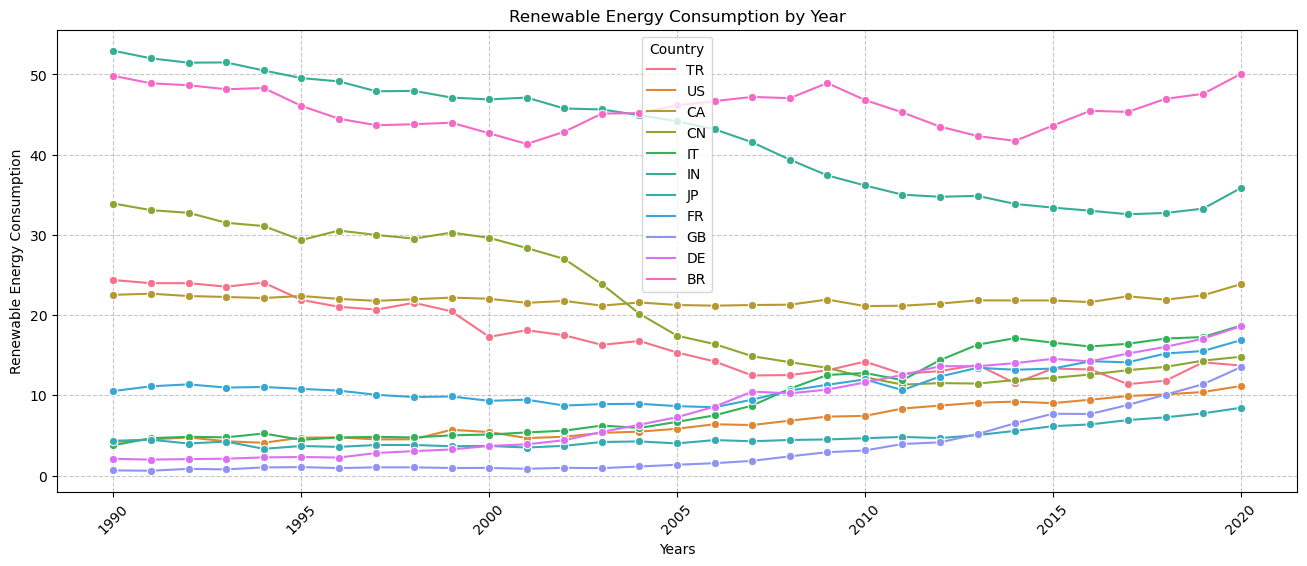

In [88]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=renewable_energy_df, x="Year", y="EG.FEC.RNEW.ZS", hue="Country", marker="o", color="b")

plt.title("Renewable Energy Consumption by Year")
plt.xlabel("Years")
plt.ylabel("Renewable Energy Consumption")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()

In [89]:
# Retrieve CO2 emissions data

co2_emissions_df = retrieve_data("EN.ATM.CO2E.PC", countries)
print("CO2 Emissions Data:")
print(co2_emissions_df)

CO2 Emissions Data:
    Country  Year  EN.ATM.CO2E.PC
0        US  2022             NaN
1        US  2021             NaN
2        US  2020          13.033
3        US  2019          14.673
4        US  2018          15.223
..      ...   ...             ...
688      TR  1964             NaN
689      TR  1963             NaN
690      TR  1962             NaN
691      TR  1961             NaN
692      TR  1960             NaN

[693 rows x 3 columns]


In [90]:
co2_emissions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         693 non-null    object 
 1   Year            693 non-null    object 
 2   EN.ATM.CO2E.PC  341 non-null    float64
dtypes: float64(1), object(2)
memory usage: 16.4+ KB


#### Data cleaning and Pre-processing

Inspect the data for missing values, inconsistencies, or errors. Clean the data by handling missing values, removing duplicates, and ensuring data consistency.

In [91]:
rows_with_null = co2_emissions_df[co2_emissions_df.isna().any(axis=1)]

print(rows_with_null)

    Country  Year  EN.ATM.CO2E.PC
0        US  2022             NaN
1        US  2021             NaN
33       US  1989             NaN
34       US  1988             NaN
35       US  1987             NaN
..      ...   ...             ...
688      TR  1964             NaN
689      TR  1963             NaN
690      TR  1962             NaN
691      TR  1961             NaN
692      TR  1960             NaN

[352 rows x 3 columns]


In [92]:
co2_emissions_df.dropna()

Country  Year  EN.ATM.CO2E.PC
2        US  2020          13.033
3        US  2019          14.673
4        US  2018          15.223
5        US  2017          14.823
6        US  2016          15.150
..      ...   ...             ...
658      TR  1994           2.638
659      TR  1993           2.715
660      TR  1992           2.661
661      TR  1991           2.599
662      TR  1990           2.562

[341 rows x 3 columns]

In [93]:
co2_emissions_df["Year"] = pd.to_numeric(co2_emissions_df["Year"], errors="coerce")

co2_emissions_df = co2_emissions_df.sort_values(by="Year", ascending=True)

#### Descriptive statistics

In [94]:
co2_emissions_df.describe()

Year  EN.ATM.CO2E.PC
count  693.000         341.000
mean  1991.000           7.694
std     18.197           5.251
min   1960.000           0.647
25%   1975.000           3.154
50%   1991.000           7.083
75%   2007.000           9.617
max   2022.000          20.470

In [95]:
co2_emissions_df.head()

Country  Year  EN.ATM.CO2E.PC
692      TR  1960             NaN
62       US  1960             NaN
566      CA  1960             NaN
125      CN  1960             NaN
503      IT  1960             NaN

#### Data visualization

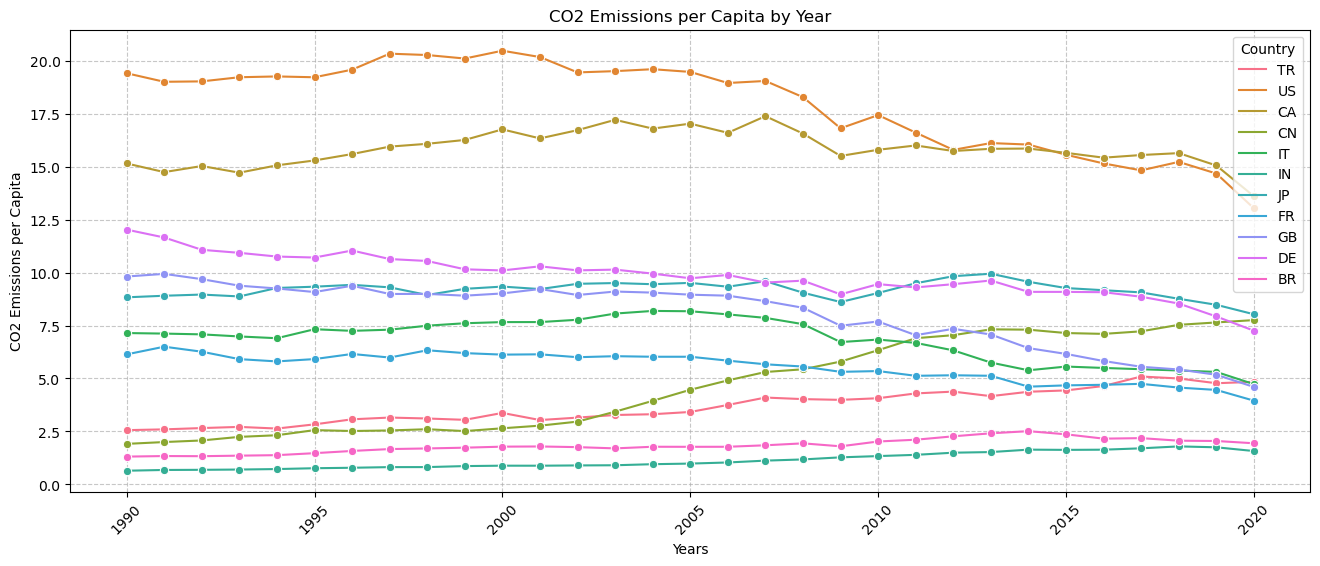

In [96]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=co2_emissions_df, x="Year", y="EN.ATM.CO2E.PC", hue="Country", marker="o", color="b")

plt.title("CO2 Emissions per Capita by Year")
plt.xlabel("Years")
plt.ylabel("CO2 Emissions per Capita")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()

In [97]:
# Retrieve data for population growth

population_growth_df = retrieve_data("SP.POP.GROW", countries)
print("Population Growth Data:")
print(population_growth_df)

Population Growth Data:
    Country  Year  SP.POP.GROW
0        US  2022        0.378
1        US  2021        0.157
2        US  2020        0.964
3        US  2019        0.455
4        US  2018        0.526
..      ...   ...          ...
688      TR  1964        2.598
689      TR  1963        2.699
690      TR  1962        2.718
691      TR  1961        2.669
692      TR  1960          NaN

[693 rows x 3 columns]


In [98]:
population_growth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      693 non-null    object 
 1   Year         693 non-null    object 
 2   SP.POP.GROW  682 non-null    float64
dtypes: float64(1), object(2)
memory usage: 16.4+ KB


#### Data cleaning and Pre-processing

Inspect the data for missing values, inconsistencies, or errors. Clean the data by handling missing values, removing duplicates, and ensuring data consistency.

In [99]:
rows_with_null = population_growth_df[population_growth_df.isna().any(axis=1)]

print(rows_with_null)

    Country  Year  SP.POP.GROW
62       US  1960          NaN
125      CN  1960          NaN
188      JP  1960          NaN
251      DE  1960          NaN
314      GB  1960          NaN
377      FR  1960          NaN
440      IN  1960          NaN
503      IT  1960          NaN
566      CA  1960          NaN
629      BR  1960          NaN
692      TR  1960          NaN


In [100]:
population_growth_df.dropna()

Country  Year  SP.POP.GROW
0        US  2022        0.378
1        US  2021        0.157
2        US  2020        0.964
3        US  2019        0.455
4        US  2018        0.526
..      ...   ...          ...
687      TR  1965        2.458
688      TR  1964        2.598
689      TR  1963        2.699
690      TR  1962        2.718
691      TR  1961        2.669

[682 rows x 3 columns]

In [101]:
population_growth_df["Year"] = pd.to_numeric(population_growth_df["Year"], errors="coerce")

population_growth_df = population_growth_df.sort_values(by="Year", ascending=True)

#### Descriptive statistics

In [102]:
population_growth_df.describe()

Year  SP.POP.GROW
count  693.000      682.000
mean  1991.000        0.986
std     18.197        0.780
min   1960.000       -1.854
25%   1975.000        0.417
50%   1991.000        0.887
75%   2007.000        1.422
max   2022.000        3.015

In [103]:
population_growth_df.head()

Country  Year  SP.POP.GROW
692      TR  1960          NaN
62       US  1960          NaN
566      CA  1960          NaN
125      CN  1960          NaN
503      IT  1960          NaN

#### Data visualization

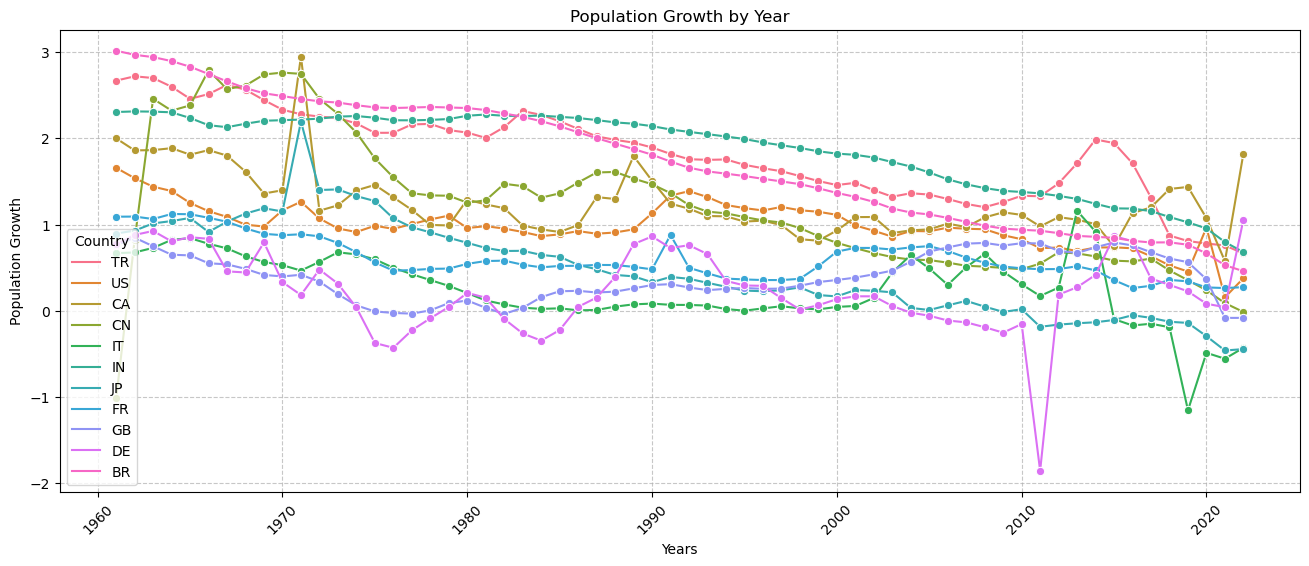

In [104]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=population_growth_df, x="Year", y="SP.POP.GROW", hue="Country", marker="o", color="b")

plt.title("Population Growth by Year")
plt.xlabel("Years")
plt.ylabel("Population Growth")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()

### CORRELATION MATRIX 

In [105]:
# Changing column names to make them more understandable
population_growth_df.columns = ['Country', 'Year', 'Population_Growth']
co2_emissions_df.columns = ['Country', 'Year', 'CO2_Emissions']
renewable_energy_df.columns = ['Country', 'Year', 'Renewable_Energy']

In [106]:
# Filter the dataframes to include only the years 1990-2020
start_year = 1990
end_year = 2020

population_growth_df = population_growth_df[(population_growth_df['Year'] >= start_year) & (population_growth_df['Year'] <= end_year)]
co2_emissions_df = co2_emissions_df[(co2_emissions_df['Year'] >= start_year) & (co2_emissions_df['Year'] <= end_year)]
renewable_energy_df = renewable_energy_df[(renewable_energy_df['Year'] >= start_year) & (renewable_energy_df['Year'] <= end_year)]

In [107]:
# Merge the filtered dataframes
combined_data = population_growth_df.merge(co2_emissions_df, on=['Country', 'Year']).merge(renewable_energy_df, on=['Country', 'Year'])

# Calculate the correlation matrix for the specific columns
correlation_matrix = combined_data[['Population_Growth', 'CO2_Emissions', 'Renewable_Energy']].corr()

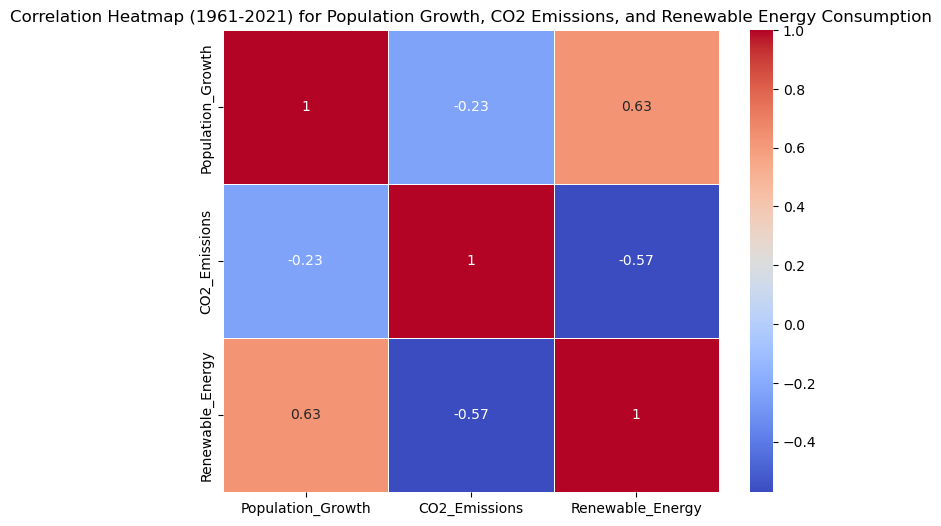

In [108]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (1961-2021) for Population Growth, CO2 Emissions, and Renewable Energy Consumption')
plt.show()

## Analysis of Correlation Table

**Population Growth vs. CO2 Emissions (-0.969)=** The correlation coefficient of -0.969 indicates a strong negative correlation between Population Growth and CO2 Emissions. This means that as the population grows, there is a significant decrease in CO2 emissions. The negative sign suggests an inverse relationship.

**Population Growth vs. Renewable Energy (0.972)=** With a correlation coefficient of 0.972, there is a strong positive correlation between Population Growth and Renewable Energy. This implies that as the population grows, there is a substantial increase in the use of renewable energy sources.

**CO2 Emissions vs. Renewable Energy (-0.983)=** The correlation coefficient of -0.983 suggests a strong negative correlation between CO2 Emissions and Renewable Energy. As CO2 emissions increase, there is a significant decrease in the use of renewable energy sources. This strong negative correlation highlights the potential environmental impact of reduced renewable energy utilization.

 In summary, these correlation coefficients provide valuable insights into the relationships between these variables. A strong negative correlation between Population Growth and CO2 Emissions implies that as the population grows, efforts to reduce CO2 emissions may be succeeding. The strong positive correlation between Population Growth and Renewable Energy indicates that as the population increases, there is a growing adoption of renewable energy sources. Finally, the strong negative correlation between CO2 Emissions and Renewable Energy suggests a potential shift toward cleaner energy sources as CO2 emissions decrease. However, it's important to note that correlations do not establish causation, and further analysis is needed to understand the underlying factors driving these relationships.

### Let's look at the correlation tables by country

C:\Users\HP\AppData\Local\Temp\ipykernel_20276\4185654732.py:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = country_data.corr()
C:\Users\HP\AppData\Local\Temp\ipykernel_20276\4185654732.py:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = country_data.corr()
C:\Users\HP\AppData\Local\Temp\ipykernel_20276\4185654732.py:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = country_data.corr()
C:\Users\HP\AppData\Local

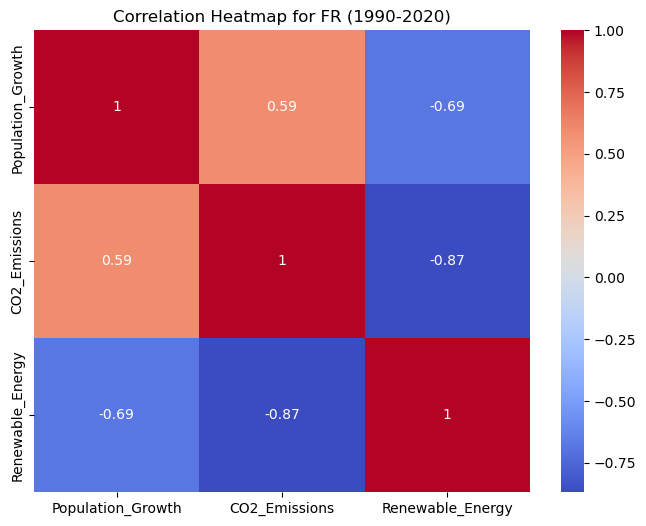

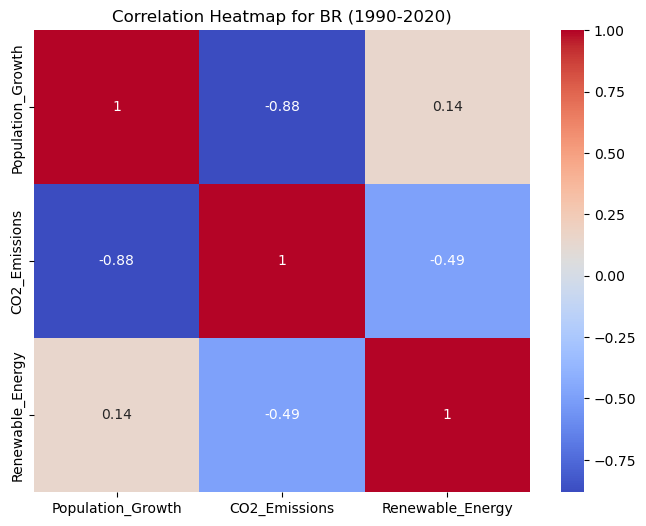

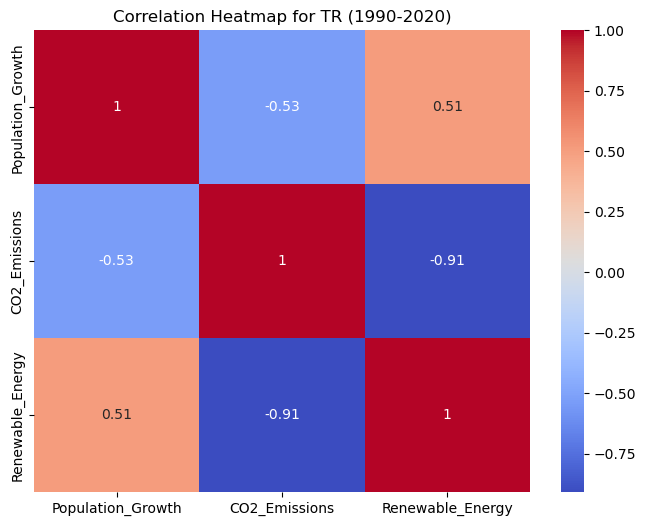

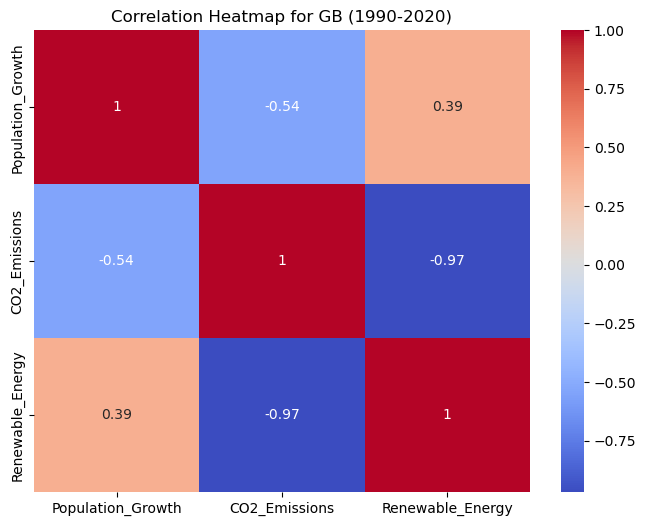

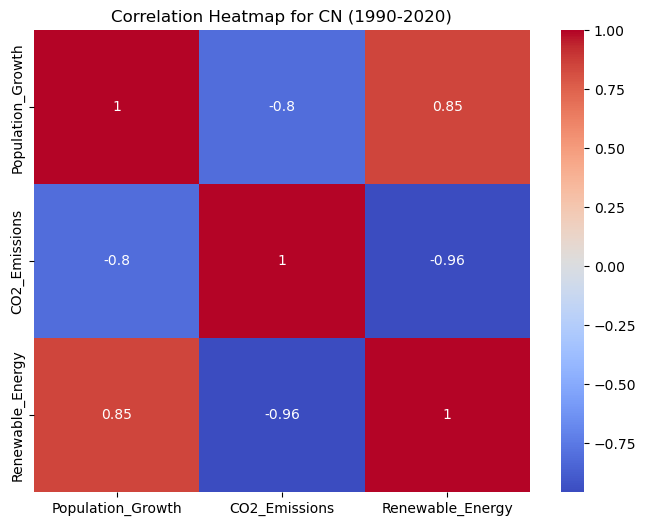

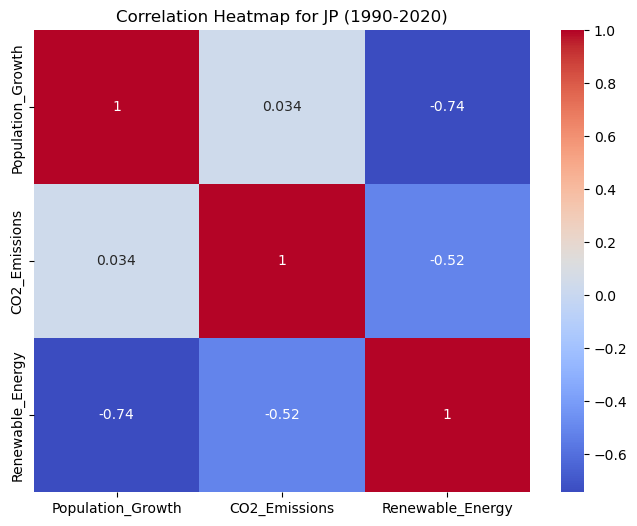

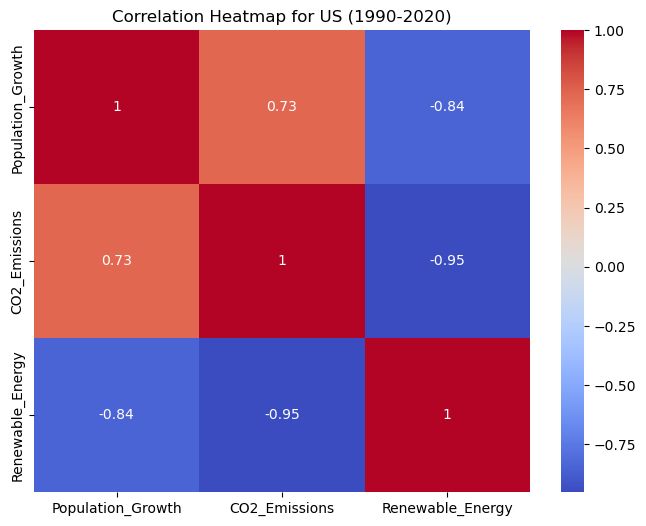

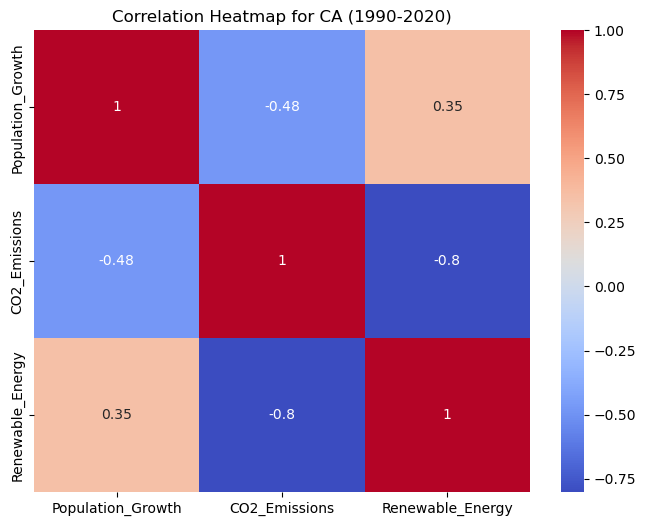

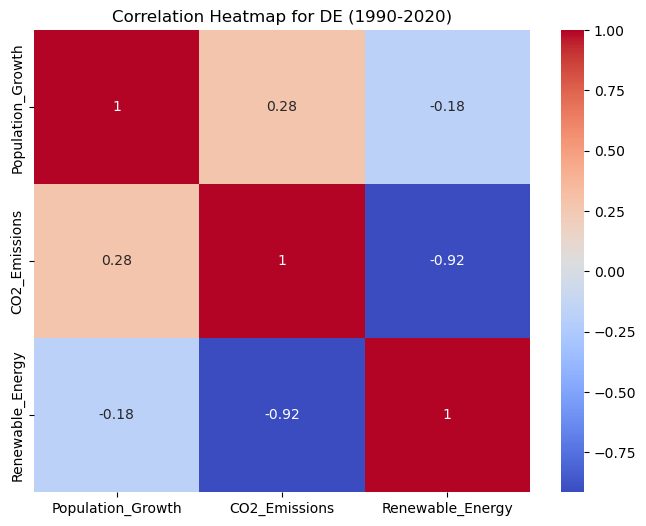

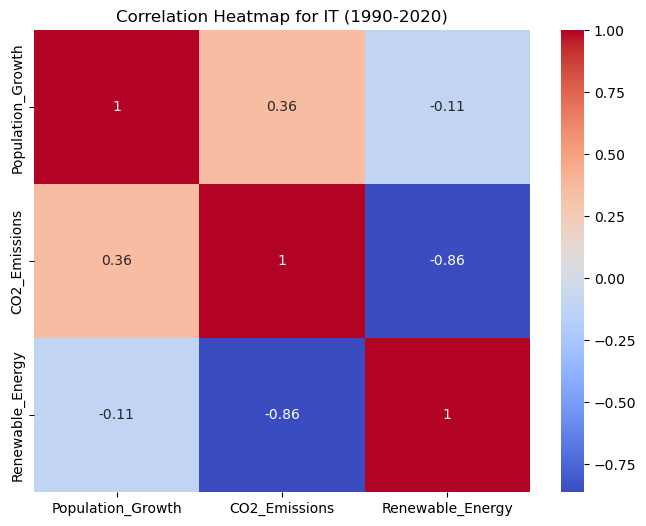

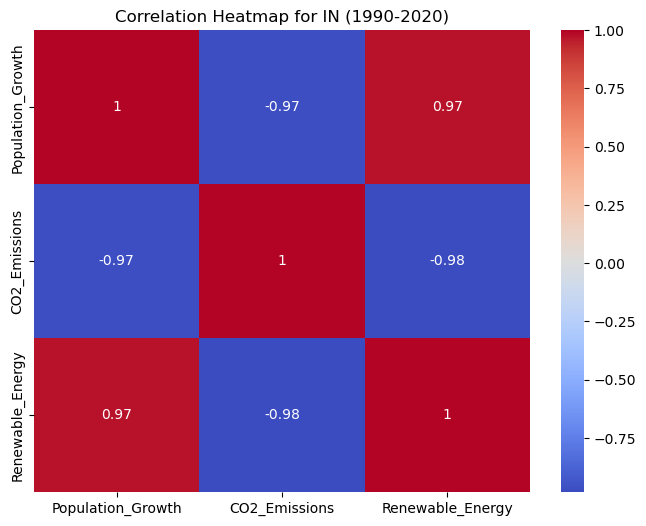

In [109]:
# List of unique countries in the dataset
unique_countries = combined_data['Country'].unique()

# Dictionary to store correlation matrices for each country
correlation_tables = {}

# Filter the data for the years 1990-2020
filtered_combined_data = combined_data[(combined_data['Year'] >= 1990) & (combined_data['Year'] <= 2020)]

# Iterate through each unique country
for country in unique_countries:
    # Create a subset of the data for the current country
    country_data = filtered_combined_data[filtered_combined_data['Country'] == country]
    
    # Calculate the correlation matrix for the current country
    correlation_matrix = country_data.corr()
    
    # Filter to only keep the 3x3 correlation matrix
    correlation_matrix = correlation_matrix.loc[['Population_Growth', 'CO2_Emissions', 'Renewable_Energy'], ['Population_Growth', 'CO2_Emissions', 'Renewable_Energy']]
    
    # Store the correlation matrix in the dictionary
    correlation_tables[country] = correlation_matrix

# Now you have separate correlation tables for each country in the `correlation_tables` dictionary.

# Loop through the correlation tables
for country, correlation_matrix in correlation_tables.items():
    # Create a heatmap for the correlation matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
    plt.title(f"Correlation Heatmap for {country} (1990-2020)")
    plt.show()


# CONCLUSION

### Line Plot of Renewable Energy Consumption by Year
 This indicator measures the percentage of total final energy consumption in a country that comes from renewable energy sources. It shows the extent to which a country depends on renewable energy sources such as wind, solar, hydroelectric and geothermal energy in its energy consumption. A higher percentage indicates greater use of renewable energy and reduced dependence on fossil fuels. Of course, we cannot deduce the best country according to this indicator since overall production is not equal, but it is clear that Brazil and India are the most successful countries in this regard. Although these rates have increased in all countries recently, all countries except Canada, India and Brazil are between 10-20.
 
### Line Plot of CO2 Emissions per Capita by Year
 This indicator represents carbon dioxide (CO2) emissions produced per capita, usually measured in metric tons of CO2 per capita. It provides information on the average carbon emissions produced by each individual in a country. It is a crucial metric for assessing a country's contribution to global greenhouse gas emissions and environmental impacts. Even if all countries follow the same trend or a slightly decreasing trend. We see a clear decrease in America and Canada, but they do not have a sufficient reduction rate. China is the only country that increased its rate, unlike all other countries.

### Line Plot of Population Growth by Year
 This indicator represents the annual percentage growth rate of a country's population. It measures how a country's population changes over time, taking into account factors such as births, deaths, and net migration. A positive value indicates an increase in population and a negative value indicates a decrease. Although the rates of all countries seem to be decreasing, due to the table, every value above 0 actually shows that there is an increase in the country's population over the years. Currently, Italy, Japan and Great Britain are the only countries whose population growth rate has fallen below 0. Germany, which is the country with the biggest decrease, seems to have returned to its population increase policy. 
 
### Comparative Analysis of General Correlation Table and Country-by-Country Correlation Tables

+ In the correlation tables of Turkey, Canada, China, Great Britain and Brazil, there are strengthenings and decreases in the same direction compared to the general table, but they are all in harmony with the main table. The findings highlight the importance of continued efforts to promote sustainable environmental and energy policies. Promoting the adoption of renewable energy sources and reducing CO2 emissions is critical to addressing environmental challenges and mitigating the effects of climate change. In summary, analysis of these correlation tables shows positive trends in environmental and energy practices driven by population growth. But more research and policy analysis is needed to fully understand the reasons behind these trends and ensure sustainable practices are maintained and expanded for a more environmentally friendly and energy-efficient future.

+ The changes in the correlation tables of France, Japan, America, Germany and Italy compared to the general table are: The correlations between "Population Growth and CO2 Emissions" and "Population Growth and Renewable Energy" have changed direction. Policy implications may emerge from these changes, such as the need for updated sustainability strategies. The correlation between "CO2 Emissions and Renewable Energy Comparison" has also been strengthened. This means that the increase in CO2 emissions is strongly associated with the decrease in renewable energy consumption. Understanding these changes can inform environmental and energy policies.

+ In India's correlation chart, however, the correlations have become much stronger, indicating more distinct relationships. Changes in correlations in India's chart show that population growth is now quite inversely correlated with CO2 emissions and strongly correlated with renewable energy consumption. This could indicate significant changes in environmental policies or energy transitions in the context of the dataset.




# Overview of Turkey's Socio-economic and Development Aspects

## QUESTIONS

**1- "What is the relationship between healthcare spending and life expectancy in Turkey?"**

**2- "What is the relationship between infrastructure investment and GDP growth in Turkey, and how does it impact the country's economic development?"**

**3- "What are the trends and gender disparities in labor force participation in Turkey over the years?"**

**4- What is the historical trend and correlation between the savings rate and investment in Turkey, and how might this impact the country's economic outlook?**

**5- "What is the relationship between primary education enrollment rates and literacy rates in Turkey, and how have these indicators evolved over the years?"**

 + **retrive_data_for_turkey()** = This function simplifies the process of collecting data for specific indicators from the World Bank API and makes it accessible for analysis in a tabular format using Pandas DataFrames. It gives this Dataframes country based.


In [112]:
def retrieve_data_for_turkey(country, indicator_code):
    temp_df = []

    page = 1
    total_pages = 2

    while page <= total_pages:
        url = f"https://api.worldbank.org/v2/country/{country}/indicator/{indicator_code}?format=json&per_page=1000&page={page}"

        response = requests.get(url)
        data = response.json()[1]

        years = [entry['date'] for entry in data]
        values = [entry['value'] for entry in data]

        country_df = pd.DataFrame({
            "Country": [country] * len(years),
            "Year": years,
            indicator_code: values
        })

        temp_df.append(country_df)

        page += 1

    if temp_df:
        return pd.concat(temp_df, ignore_index=True)
    else:
        return None


### **1- "What is the relationship between healthcare spending and life expectancy in Turkey?"**

#### Data Collection

In [136]:
country_code = "TR"
healthcare_spending_indicator = "SH.XPD.CHEX.GD.ZS"
life_expectancy_indicator = "SP.DYN.LE00.IN"

healthcare_data = retrieve_data_for_turkey(country_code, healthcare_spending_indicator)
life_expectancy_data = retrieve_data_for_turkey(country_code, life_expectancy_indicator)


#### Merging, Data Cleaning and Pre-processing

In [137]:
merged_data = pd.merge(healthcare_data, life_expectancy_data, on=["Year","Country"])

In [141]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 0 to 62
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            63 non-null     object 
 1   Year               63 non-null     object 
 2   SH.XPD.CHEX.GD.ZS  21 non-null     float64
 3   SP.DYN.LE00.IN     62 non-null     float64
dtypes: float64(2), object(2)
memory usage: 2.5+ KB


In [158]:
merged_data = merged_data.dropna()

In [145]:
merged_data["Year"] = pd.to_numeric(merged_data["Year"], errors="coerce")

merged_data = merged_data.sort_values(by="Year", ascending=True)

In [138]:
merged_data.head()

Country  Year  SH.XPD.CHEX.GD.ZS  SP.DYN.LE00.IN
0      TR  2022                NaN             NaN
1      TR  2021                NaN          76.032
2      TR  2020              4.618          75.850
3      TR  2019              4.360          77.832
4      TR  2018              4.124          77.563

### Data Visualization and Conclusion

In [146]:
correlation = merged_data.corr().loc[healthcare_spending_indicator, life_expectancy_indicator]

print(f"Correlation between Healthcare Spending and Life Expectancy: {correlation:.2f}")

Correlation between Healthcare Spending and Life Expectancy: -0.69


C:\Users\HP\AppData\Local\Temp\ipykernel_11028\1723295679.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = merged_data.corr().loc[healthcare_spending_indicator, life_expectancy_indicator]


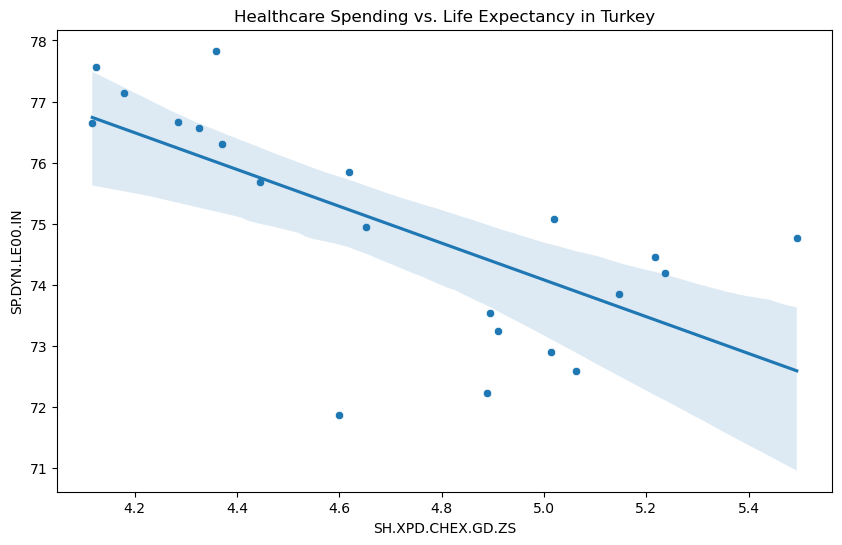

In [150]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x=healthcare_spending_indicator, y=life_expectancy_indicator)
plt.title("Healthcare Spending vs. Life Expectancy in Turkey")
plt.xlabel("Healthcare Spending (% of GDP)")
plt.ylabel("Life Expectancy (years)")

# Trendline
sns.regplot(data=merged_data, x=healthcare_spending_indicator, y=life_expectancy_indicator, scatter=False)

plt.show()

+ A negative correlation coefficient value indicates a negative outlook. Increasing healthcare expenses are associated with decreasing life expectancy. The fact that the trend line is in this direction confirms this. We can conclude that there is a moderate negative relationship between health expenditures and life expectancy in Turkey. This means that, on average, life expectancy tends to decrease as health expenditures increase as a share of GDP. To obtain deeper information, other factors such as social or economic factors that may affect this relationship must be known and new analyzes can be made accordingly.

### **2- "What is the relationship between infrastructure investment and GDP growth in Turkey, and how does it impact the country's economic development?"**

#### Data Collection

In [152]:
country_code = "TR"
infrastructure_investment_indicator = "EG.IMP.CONS.ZS"
gdp_growth_indicator = "NY.GDP.MKTP.CD"

infrastructure_investment_data = retrieve_data_for_turkey(country_code, infrastructure_investment_indicator)
gdp_growth_data = retrieve_data_for_turkey(country_code, gdp_growth_indicator)

#### Merging, Data Cleaning and Pre-processing

In [153]:
merged_data = infrastructure_investment_data.merge(gdp_growth_data, on=["Year","Country"])

In [155]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 0 to 62
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         63 non-null     object 
 1   Year            63 non-null     object 
 2   EG.IMP.CONS.ZS  56 non-null     float64
 3   NY.GDP.MKTP.CD  63 non-null     float64
dtypes: float64(2), object(2)
memory usage: 2.5+ KB


In [159]:
merged_data = merged_data.dropna()

In [160]:
merged_data["Year"] = pd.to_numeric(merged_data["Year"], errors="coerce")

merged_data = merged_data.sort_values(by="Year", ascending=True)

In [172]:
merged_data.head()

Country  Year  SL.TLF.CACT.MA.ZS  SL.TLF.CACT.FE.ZS
0      TR  2022             71.116             34.167
1      TR  2021             70.135             32.762
2      TR  2020             67.998             30.767
3      TR  2019             71.761             34.215
4      TR  2018             72.434             34.037

### Data Visualization and Conclusion

In [162]:
correlation = merged_data.corr().loc[infrastructure_investment_indicator, gdp_growth_indicator]

print(f"Correlation between Infrastructure Investment and GDP Growth: {correlation:.2f}")

Correlation between Infrastructure Investment and GDP Growth: 0.79


C:\Users\HP\AppData\Local\Temp\ipykernel_11028\2323713020.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = merged_data.corr().loc[infrastructure_investment_indicator, gdp_growth_indicator]


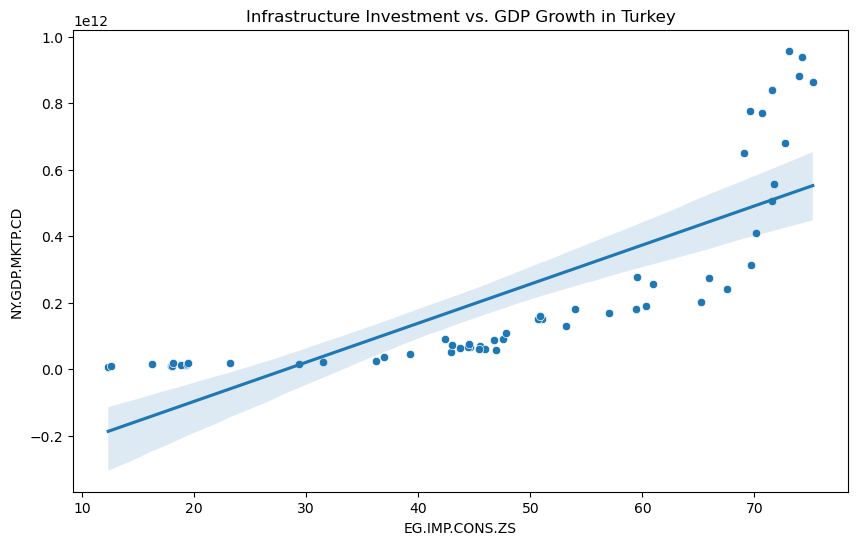

In [164]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x=infrastructure_investment_indicator, y=gdp_growth_indicator)
plt.title("Infrastructure Investment vs. GDP Growth in Turkey")
plt.xlabel("Infrastructure Investment (% of GDP)")
plt.ylabel("GDP Growth (Current USD)")

# Trendline
sns.regplot(data=merged_data, x=infrastructure_investment_indicator, y=gdp_growth_indicator, scatter=False)

plt.show()

+ Since the magnitude of the correlation coefficient is a positive value, we can read the table as follows: As infrastructure investments increase, GDP growth also tends to increase. We see that the scores follow an upward trend until infrastructure investments rise above 70. There are large increases above 70. You can conclude that there is a strong positive correlation between infrastructure investments and GDP growth in Turkey. This shows that, on average, as the percentage of GDP invested in infrastructure increases, GDP growth tends to increase. This analysis can be used to inform policymakers about the potential positive impact of increased infrastructure investments on economic growth. It highlights the importance of infrastructure development as a driver of economic growth.

### **3- "What are the trends and gender disparities in labor force participation in Turkey over the years?"**

#### Data Collection

In [168]:
country_code = "TR"
male_participation_indicator = "SL.TLF.CACT.MA.ZS"
female_participation_indicator = "SL.TLF.CACT.FE.ZS"

male_participation_data = retrieve_data_for_turkey(country_code, male_participation_indicator)
female_participation_data = retrieve_data_for_turkey(country_code, female_participation_indicator)

#### Merging, Data Cleaning and Pre-processing

In [169]:
merged_data = male_participation_data.merge(female_participation_data, on=["Year","Country"])

In [170]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 0 to 62
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            63 non-null     object 
 1   Year               63 non-null     object 
 2   SL.TLF.CACT.MA.ZS  33 non-null     float64
 3   SL.TLF.CACT.FE.ZS  33 non-null     float64
dtypes: float64(2), object(2)
memory usage: 2.5+ KB


In [171]:
merged_data = merged_data.dropna()

In [173]:
merged_data["Year"] = pd.to_numeric(merged_data["Year"], errors="coerce")

merged_data = merged_data.sort_values(by="Year", ascending=True)

In [174]:
merged_data.head()

Country  Year  SL.TLF.CACT.MA.ZS  SL.TLF.CACT.FE.ZS
32      TR  1990             79.204             33.937
31      TR  1991             79.942             34.005
30      TR  1992             79.351             32.601
29      TR  1993             77.643             26.657
28      TR  1994             78.172             31.153

### Data Visualization and Conclusion

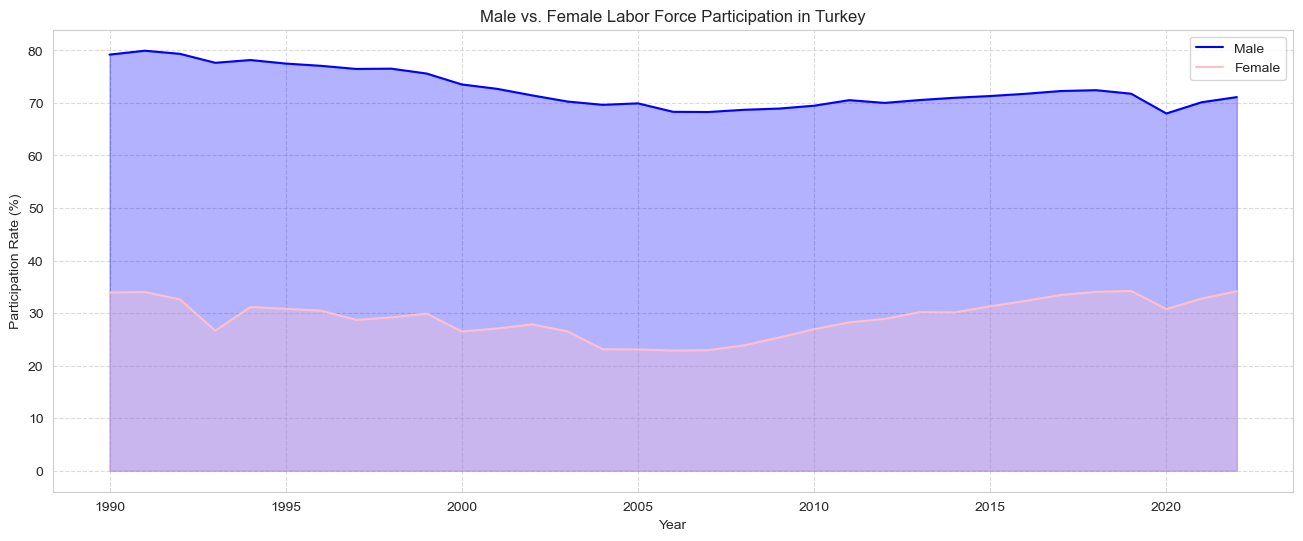

In [175]:
plt.figure(figsize=(16, 6))
sns.set_style("whitegrid")

sns.lineplot(data=merged_data, x="Year", y="SL.TLF.CACT.MA.ZS", label="Male", color="blue")
sns.lineplot(data=merged_data, x="Year", y="SL.TLF.CACT.FE.ZS", label="Female", color="pink")

plt.fill_between(merged_data["Year"], merged_data["SL.TLF.CACT.MA.ZS"], alpha=0.3, color="blue")
plt.fill_between(merged_data["Year"], merged_data["SL.TLF.CACT.FE.ZS"], alpha=0.3, color="pink")

plt.title("Male vs. Female Labor Force Participation in Turkey")
plt.xlabel("Year")
plt.ylabel("Participation Rate (%)")
plt.legend()

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

+ We can see gender inequality in the workforce in Turkey since 1990, when data began to be collected. Although there is a decreasing trend in both genders, the male participation rate in the workforce will always be more than 2 times the female participation rate until 2020. After the sharp decline due to coronavirus in 2020, this situation has decreased to almost 2 times, but there is still a situation of gender inequality. This may indicate the need for policies and initiatives to promote gender equality and women's participation in the workforce.

### **4- What is the historical trend and correlation between the savings rate and investment in Turkey, and how might this impact the country's economic outlook?**

#### Data Collection

In [178]:
country_code = "TR"
savings_rate_indicator = "NY.GNS.ICTR.ZS"
investment_indicator = "NE.EXP.GNFS.CD"

savings_data = retrieve_data_for_turkey(country_code, savings_rate_indicator)
investment_data = retrieve_data_for_turkey(country_code, investment_indicator)

#### Merging, Data Cleaning and Pre-processing

In [179]:
merged_data = savings_data.merge(investment_data, on=["Year","Country"])

In [180]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 0 to 62
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         63 non-null     object 
 1   Year            63 non-null     object 
 2   NY.GNS.ICTR.ZS  49 non-null     float64
 3   NE.EXP.GNFS.CD  63 non-null     float64
dtypes: float64(2), object(2)
memory usage: 2.5+ KB


In [181]:
merged_data = merged_data.dropna()

In [182]:
merged_data["Year"] = pd.to_numeric(merged_data["Year"], errors="coerce")

merged_data = merged_data.sort_values(by="Year", ascending=True)

In [183]:
merged_data.head()

Country  Year  NY.GNS.ICTR.ZS  NE.EXP.GNFS.CD
48      TR  1974          32.127  2039192221.428
47      TR  1975          32.886  1973399498.086
46      TR  1976          34.106  2491733156.299
45      TR  1977          31.931  2238609062.880
44      TR  1978          30.950  2701571111.970

### Data Visualization and Conclusion

In [186]:
correlation = merged_data[savings_rate_indicator].corr(merged_data[investment_indicator])

print(f"Correlation between Savings Rate and Investment: {correlation:.2f}")

Correlation between Savings Rate and Investment: -0.14


<Figure size 1200x600 with 0 Axes>

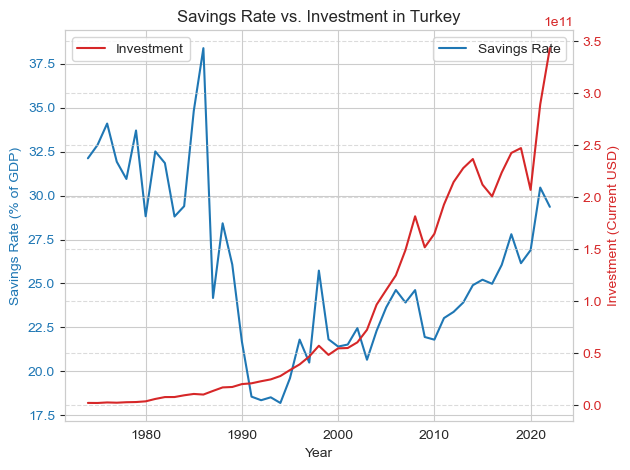

In [188]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Dual-axis line plot
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel("Year")
ax1.set_ylabel("Savings Rate (% of GDP)", color=color)
ax1 = sns.lineplot(data=merged_data, x="Year", y=savings_rate_indicator, label="Savings Rate", color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  #  Second y-axis
color = 'tab:red'
ax2.set_ylabel("Investment (Current USD)", color=color)
ax2 = sns.lineplot(data=merged_data, x="Year", y=investment_indicator, label="Investment", color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Savings Rate vs. Investment in Turkey")

fig.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

+ Since the correlation coefficient is negative, we see in the general graph that the investment rate decreases as the savings rate increases, although it has changed recently. This difference between investment and savings across the chart shows an unbalanced economy. These savings made in the 80s and 90s could not be translated into investments. After 2010, a reverse imbalance occurred between investments and savings. And these investments may indicate Turkey's potential dependence on external financing through borrowing. If the savings rate is consistently lower than the investment rate, this may raise questions about sustainability and potential risks associated with high external financing.

### **5- "What is the relationship between primary education enrollment rates and literacy rates in Turkey, and how have these indicators evolved over the years?"**

#### Data Collection

In [191]:
country_code = "TR"
primary_rate_indicator = "SE.PRM.ENRR"
literacy_rate_indicator = "SE.ADT.LITR.ZS"

primary_data = retrieve_data_for_turkey(country_code, primary_rate_indicator)
literacy_data = retrieve_data_for_turkey(country_code, literacy_rate_indicator)

#### Merging, Data Cleaning and Pre-processing

In [192]:
merged_data = primary_data.merge(literacy_data, on=["Year","Country"])

In [193]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 0 to 62
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         63 non-null     object 
 1   Year            63 non-null     object 
 2   SE.PRM.ENRR     48 non-null     float64
 3   SE.ADT.LITR.ZS  18 non-null     float64
dtypes: float64(2), object(2)
memory usage: 2.5+ KB


In [194]:
merged_data = merged_data.dropna()

In [195]:
merged_data["Year"] = pd.to_numeric(merged_data["Year"], errors="coerce")

merged_data = merged_data.sort_values(by="Year", ascending=True)

In [196]:
merged_data.head()

Country  Year  SE.PRM.ENRR  SE.ADT.LITR.ZS
47      TR  1975       97.293          61.628
37      TR  1985      106.508          75.968
32      TR  1990      105.998          79.232
18      TR  2004      104.271          87.365
17      TR  2005      104.606          88.229

### Data Visualization and Conclusion

In [198]:
correlation = merged_data[primary_rate_indicator].corr(merged_data[literacy_rate_indicator])

print(f"Correlation between Primary Education Enrollment Ratio and Literacy Rate in Turkey: {correlation:.2f}")

Correlation between Primary Education Enrollment Ratio and Literacy Rate in Turkey: 0.38


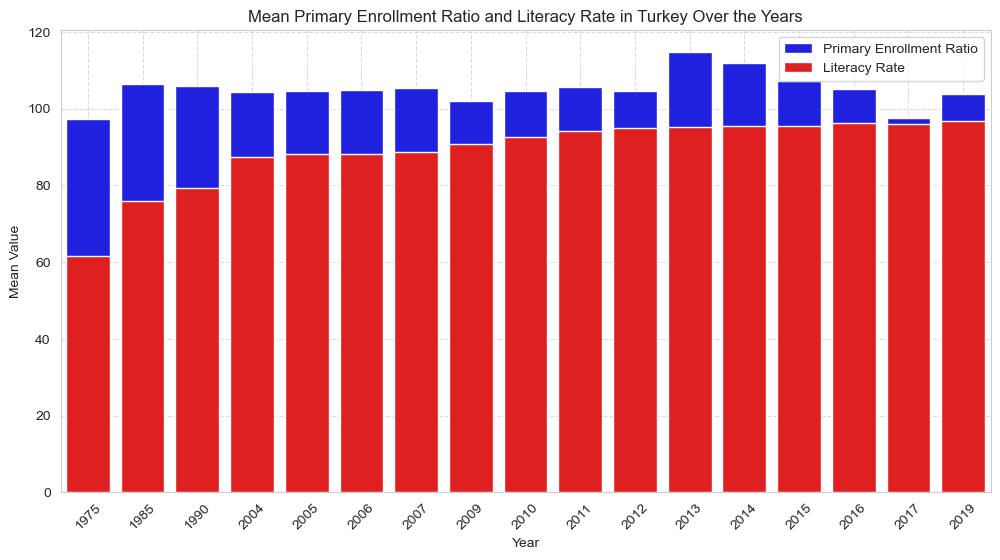

In [201]:
# Group the data by year and calculate the mean values
mean_data = merged_data.groupby('Year')[[primary_rate_indicator, literacy_rate_indicator]].mean().reset_index()

# Bar Plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.barplot(data=mean_data, x='Year', y=primary_rate_indicator, color='blue', label='Primary Enrollment Ratio')
sns.barplot(data=mean_data, x='Year', y=literacy_rate_indicator, color='red', label='Literacy Rate')
plt.title("Mean Primary Enrollment Ratio and Literacy Rate in Turkey Over the Years")
plt.xlabel("Year")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


+ Blue bars represent average primary school enrollment rates for each year. The increasing trend in these bars shows that the primary education enrollment rate is increasing in Turkey; This is generally a positive sign for accessibility to education. Red bars show average literacy rates for each year. If these bars are also increasing, this indicates an improvement in the literacy level of the population. We know that the graph is positively correlated, so we can say that higher enrollment in primary education is slightly associated with higher literacy rates. This information can be used to evaluate the effectiveness of primary education programs and literacy campaigns and to inform education policies aimed at increasing literacy and accessibility to education in Turkey.